# <center>Mobile Price Prediction</center>

## Problem Statement
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

## Data Definition:

Input variables:

Independent Variable

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

**Dependent Variable**

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Table content

Import Packages
Read Data
Understand and Prepare the Data
3.1 - Data Types and Dimensions
3.2 - Data Manipulation
3.3 - Missing Data Treatment
3.4 - Statistical Summary
EDA
4.1 - Univariate Analysis
4.2 - Bivariate Analysis
4.3 - Multivariate Analysis
4.4 - Conclusion of EDA
Label Encoding for categorical Variable
Feature Selection
Standardise Data
ML Models
8.1 - Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
sns.set()

## Set Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress = True)

In [3]:
plt.rcParams["figure.figsize"] = [15,8]

In [4]:
import warnings 
warnings.filterwarnings("ignore")

## Read the Data

In [5]:
import os
os.chdir(r"D:\Imarticus\ML\Supervised learning\9  Naive bayes")
raw_data = pd.read_csv("mobile_price.csv")
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data = raw_data.copy()

In [7]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## Understand and Prepare data
	
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data :
1. Check dimensions and data types of the dataframe
2. Data Manipulation
3. Check for missing values
4. Study summary statistics

In [8]:
data.shape

(2000, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
data["n_cores"] = data["n_cores"].astype(object)
data["price_range"] = data["price_range"].astype(object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Missing Values

In [13]:
total_nulls = data.isnull().sum().sort_values(ascending = False)
percentage_nulls = (data.isnull().sum()*100)/(data.isnull().count())
percentage_nulls = percentage_nulls.sort_values(ascending = False)
missing_values = pd.concat([total_nulls,percentage_nulls],axis = 1,keys = ["Total Nulls","Percentage_Nulls"])
missing_values["Data_type"] = data[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage_Nulls,Data_type
battery_power,0,0.0,int64
px_height,0,0.0,int64
wifi,0,0.0,int64
touch_screen,0,0.0,int64
three_g,0,0.0,int64
talk_time,0,0.0,int64
sc_w,0,0.0,int64
sc_h,0,0.0,int64
ram,0,0.0,int64
px_width,0,0.0,int64


In [14]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [15]:
data.describe(include = object)

,n_cores,price_range
count,2000,2000
unique,8,4
top,4,1
freq,274,500


## EDA
Explore the features(independent variables) and check if they are inter-related to each other.

This is acheived using following steps:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

<AxesSubplot:xlabel='battery_power', ylabel='Density'>

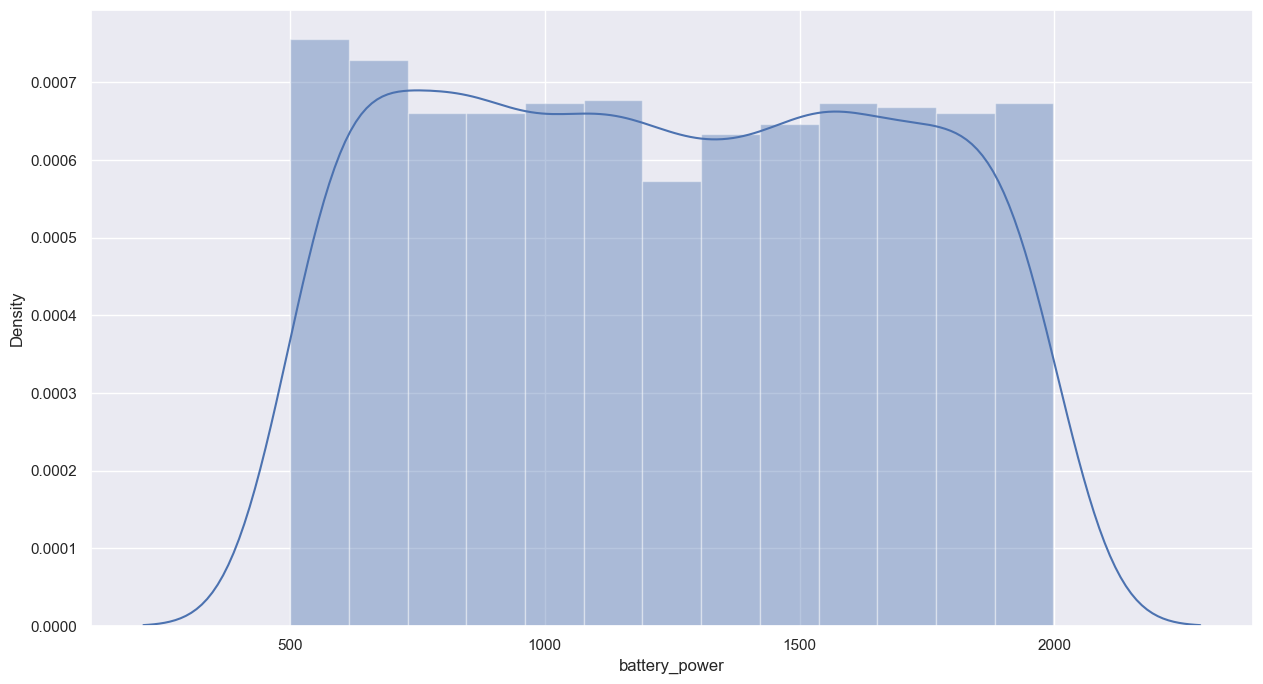

In [16]:
sns.distplot(data.battery_power)

In [17]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

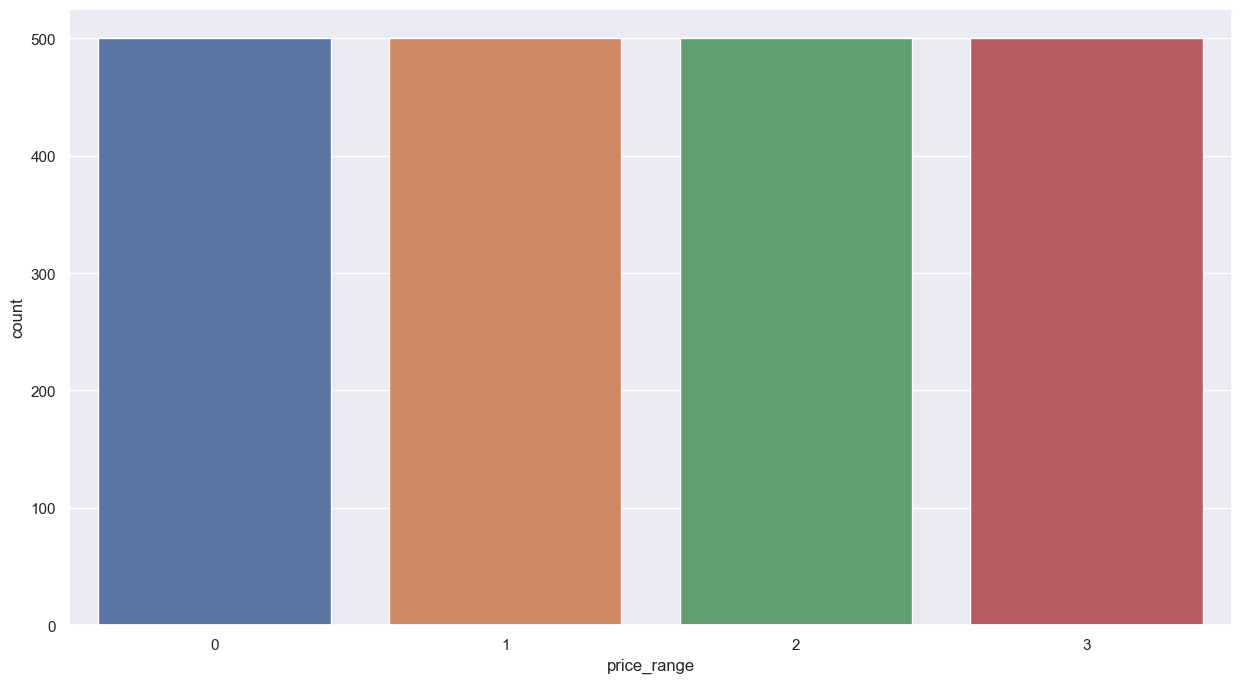

In [18]:
sns.countplot(data.price_range)

<AxesSubplot:xlabel='blue', ylabel='count'>

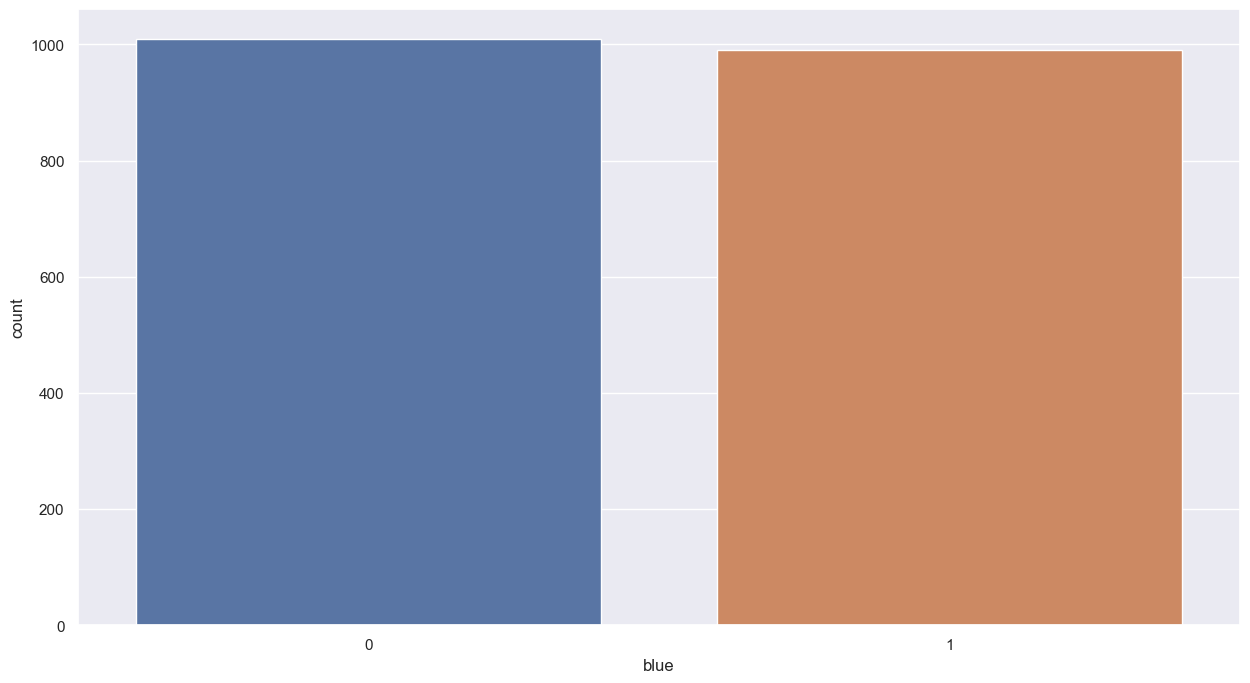

In [19]:
sns.countplot(data.blue)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

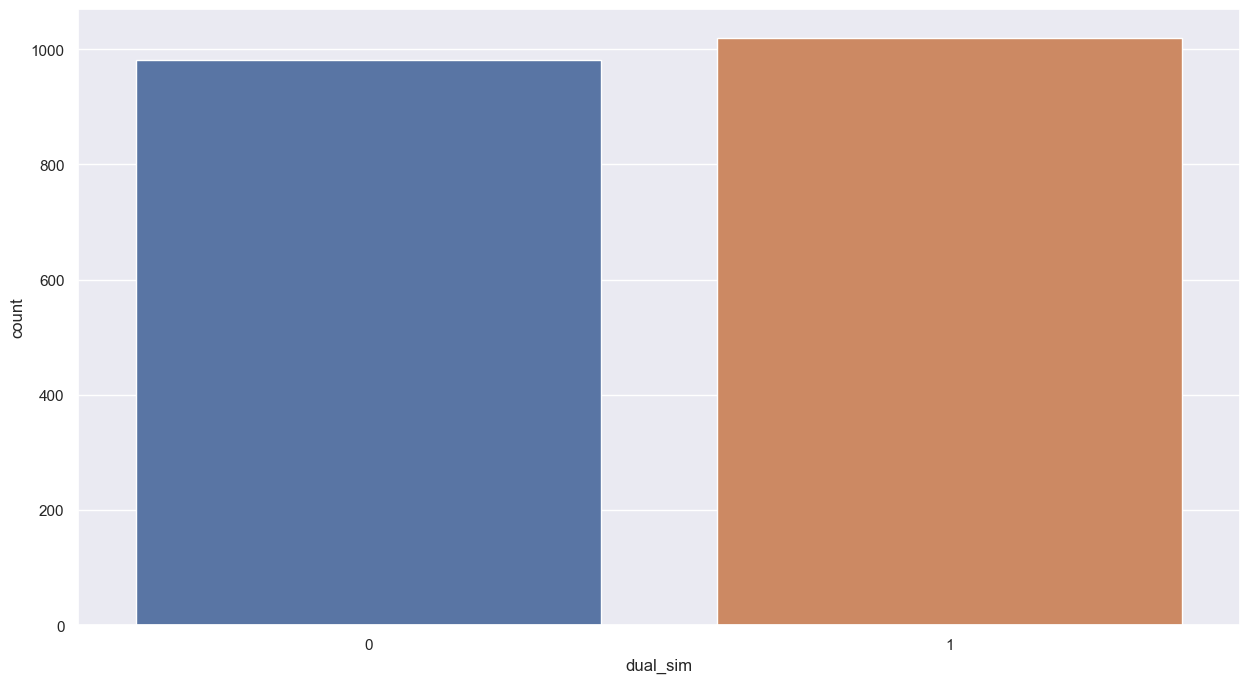

In [20]:
sns.countplot(data.dual_sim)

<AxesSubplot:>

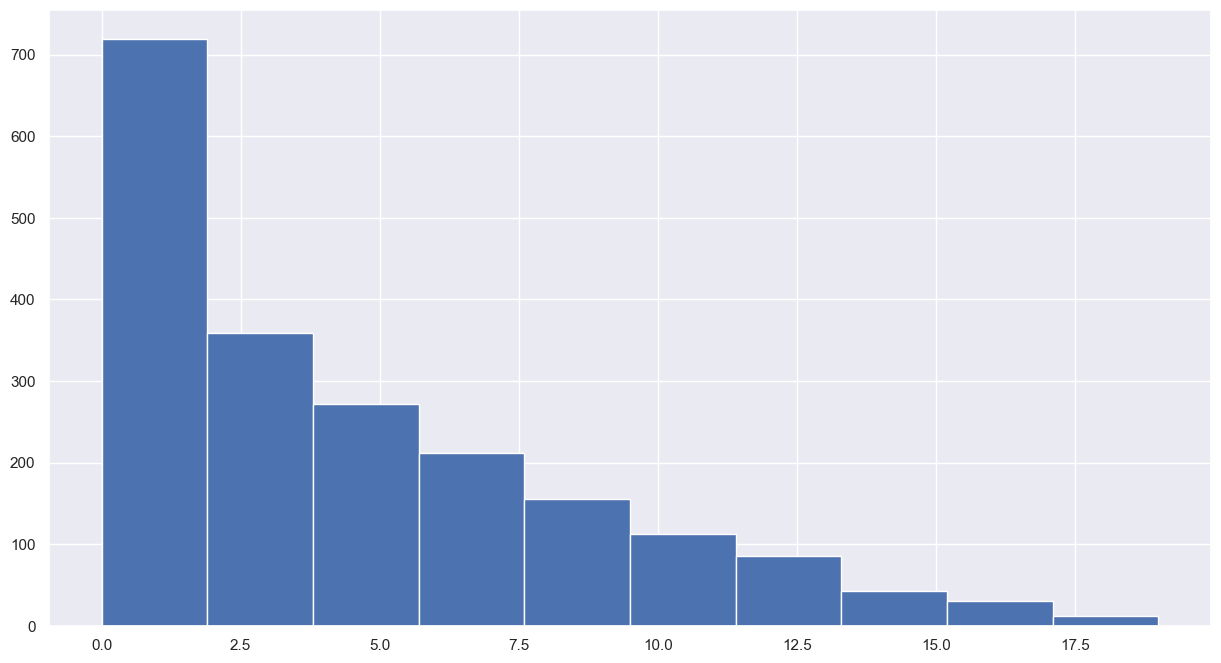

In [21]:
data.fc.hist()

In [22]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

<AxesSubplot:xlabel='four_g', ylabel='count'>

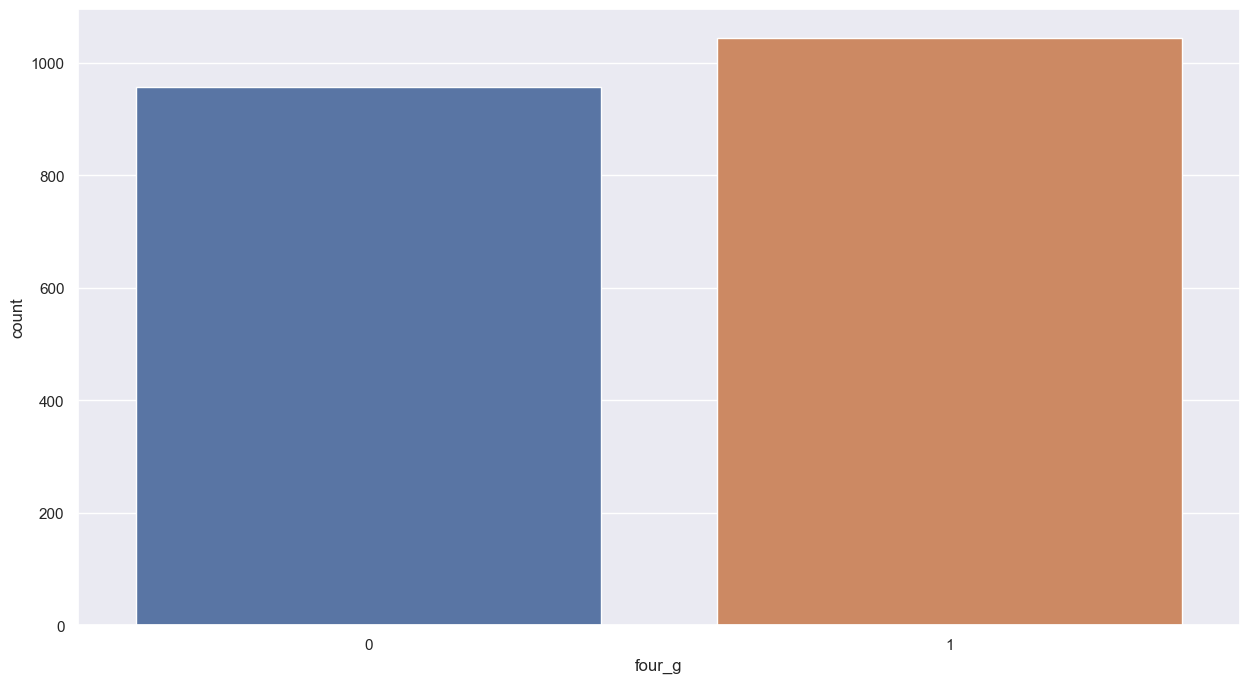

In [23]:
sns.countplot(data.four_g)

In [24]:
data.int_memory.describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

<AxesSubplot:>

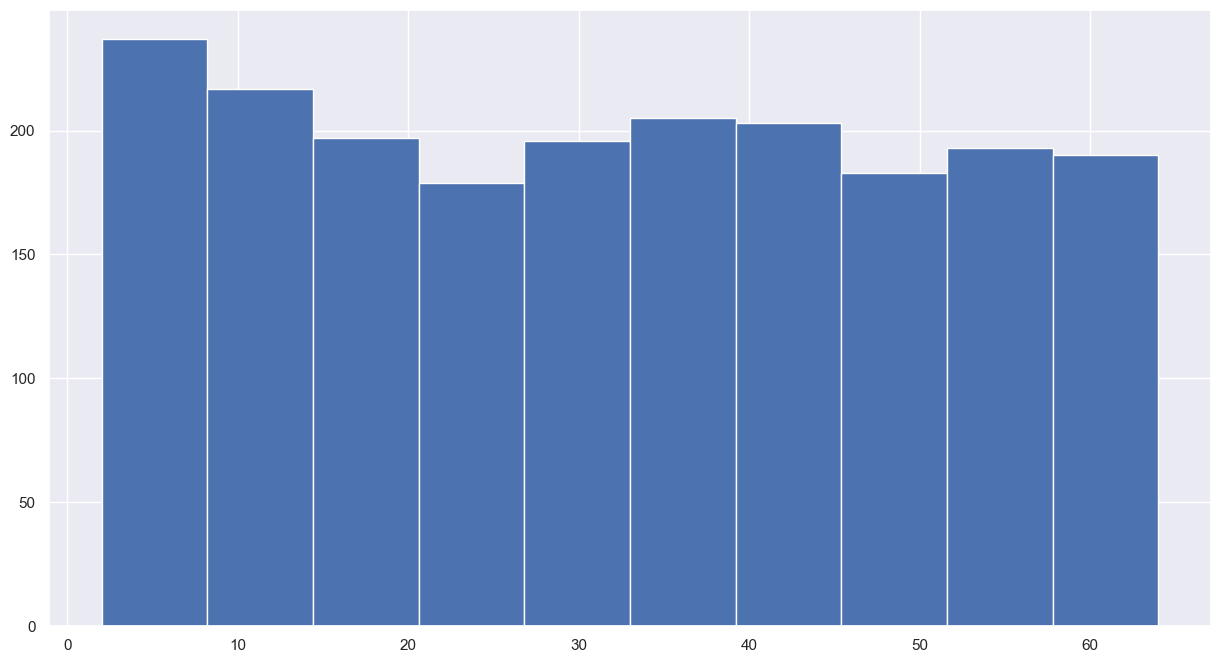

In [25]:
data.int_memory.hist()

The above distribution shows that :

The internal memory ranges from 2 to 64 GB
Also, the dataset have phone’s of different generation.i.e Older mobiles to latest one’s.

In [26]:
data.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

<AxesSubplot:>

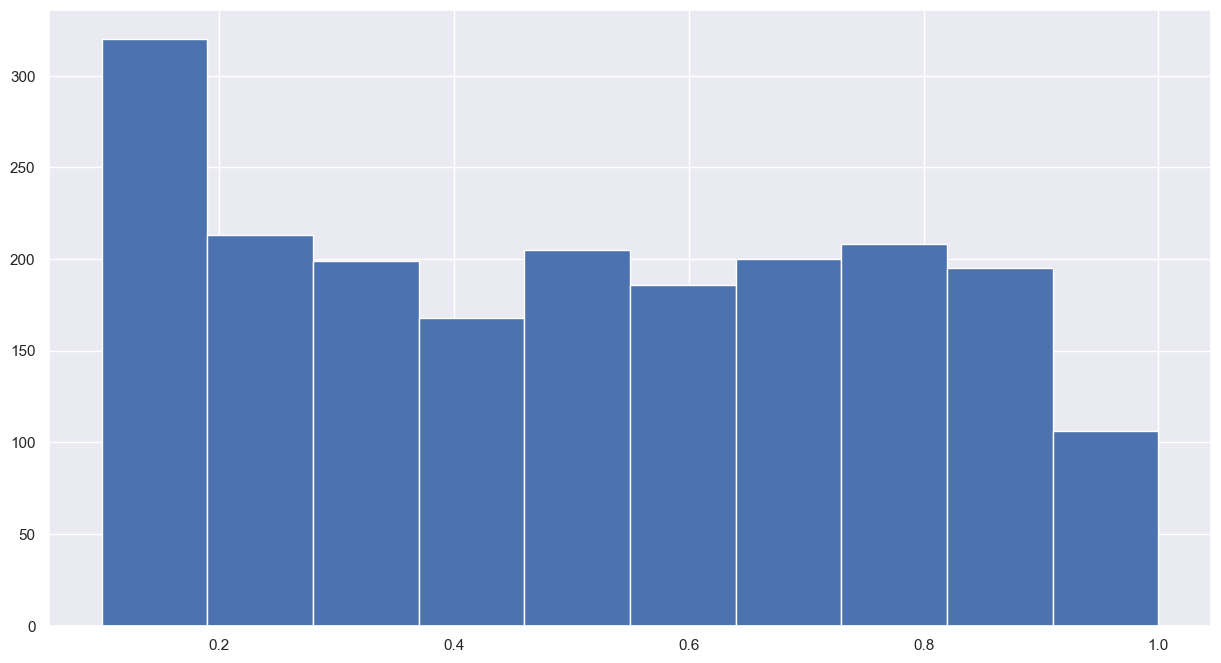

In [27]:
data.m_dep.hist()

In [28]:
data.mobile_wt.describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

<AxesSubplot:>

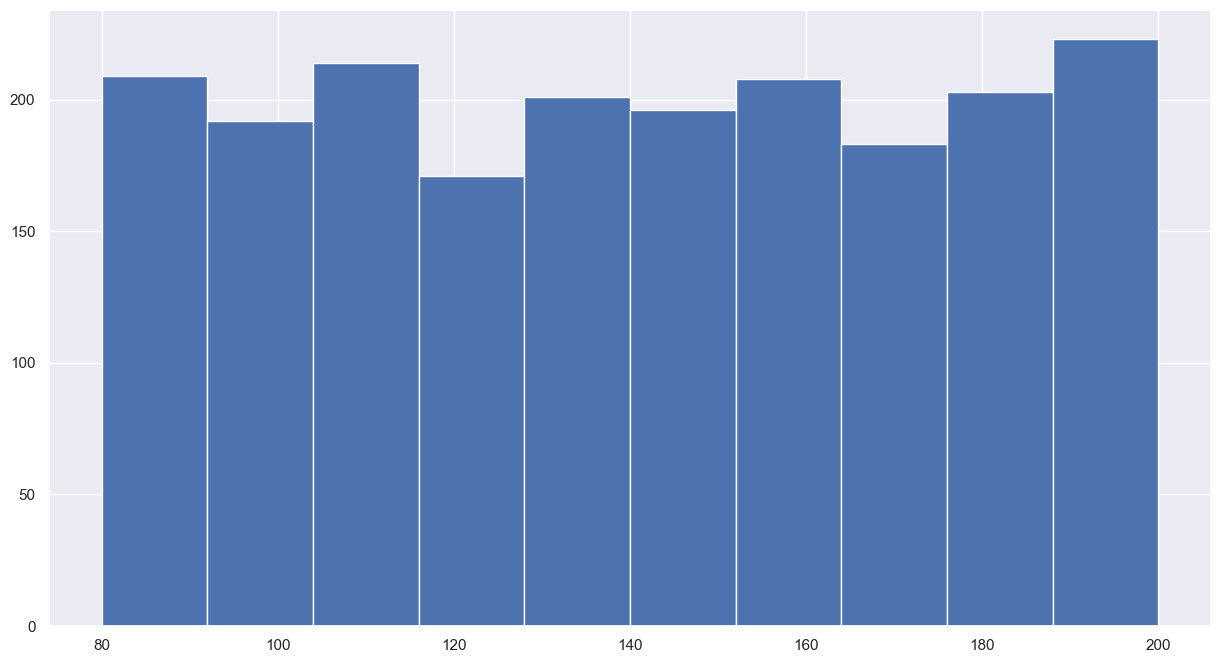

In [29]:
data.mobile_wt.hist()

In [30]:
data.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

<AxesSubplot:xlabel='n_cores', ylabel='count'>

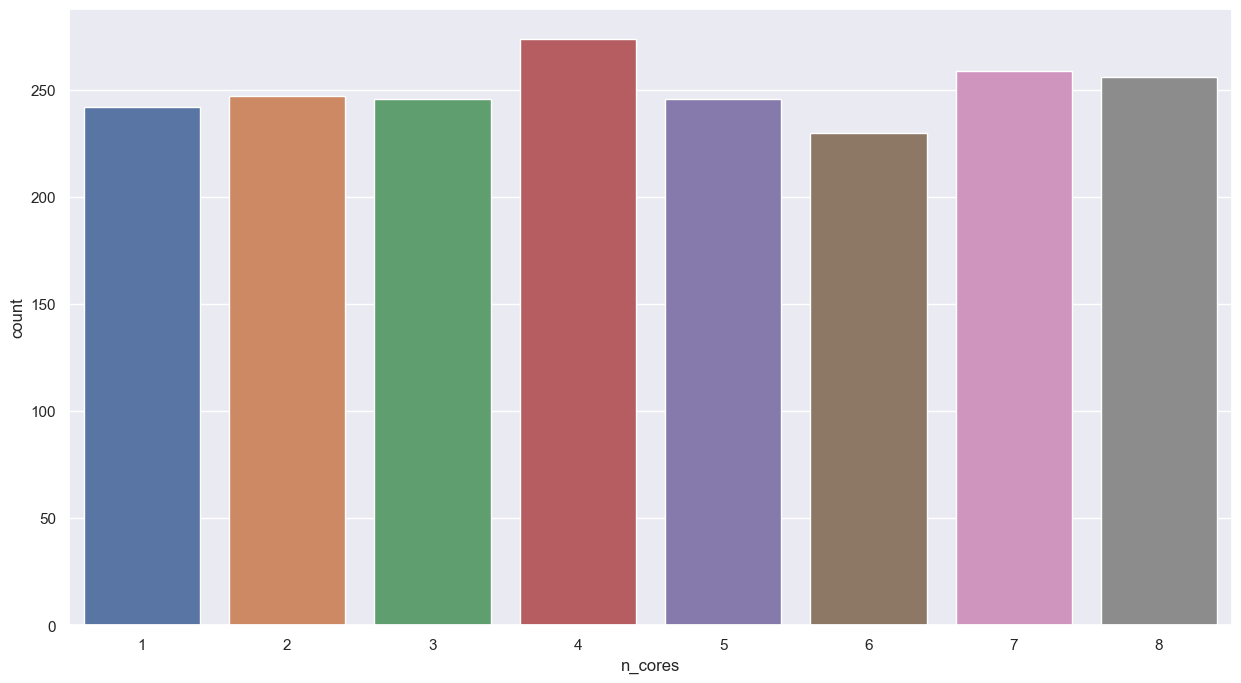

In [31]:
sns.countplot(data.n_cores)

In [32]:
data.pc.describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

(array([205., 192., 154., 214., 201., 201., 175., 196., 187., 275.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

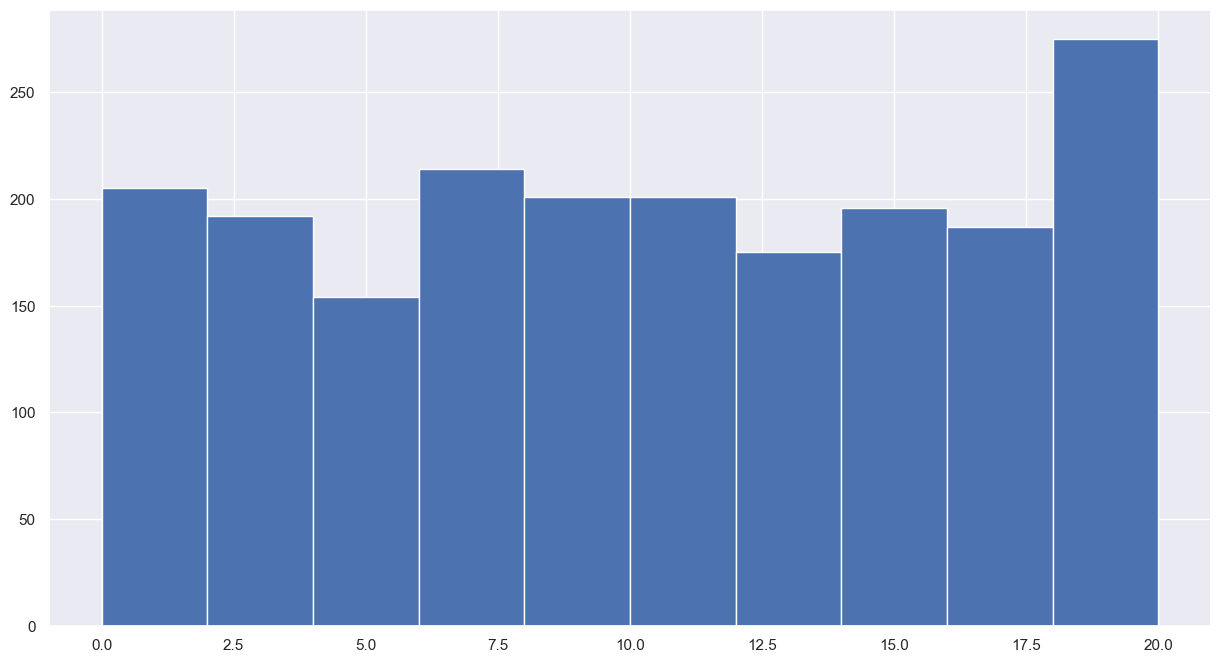

In [34]:
plt.hist(data.pc)

In [35]:
data.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

<AxesSubplot:xlabel='px_height', ylabel='Density'>

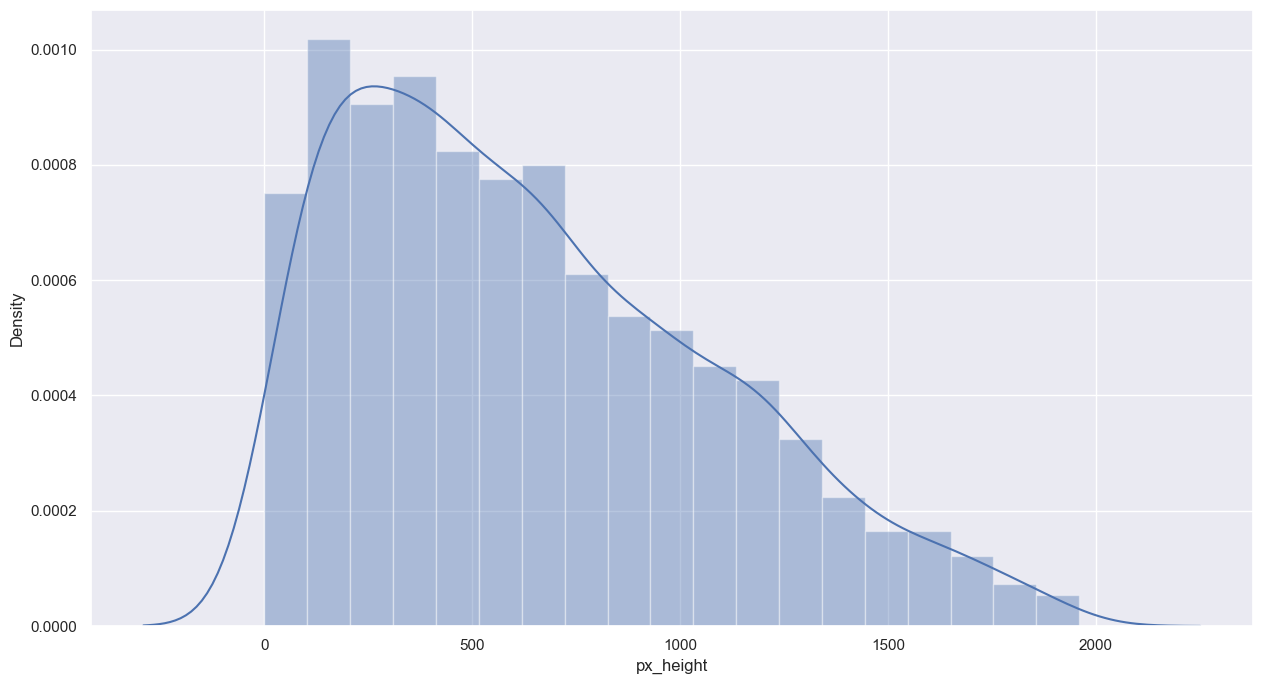

In [36]:
sns.distplot(data.px_height)

In [37]:
data.px_width.describe()

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

<AxesSubplot:xlabel='px_width', ylabel='Density'>

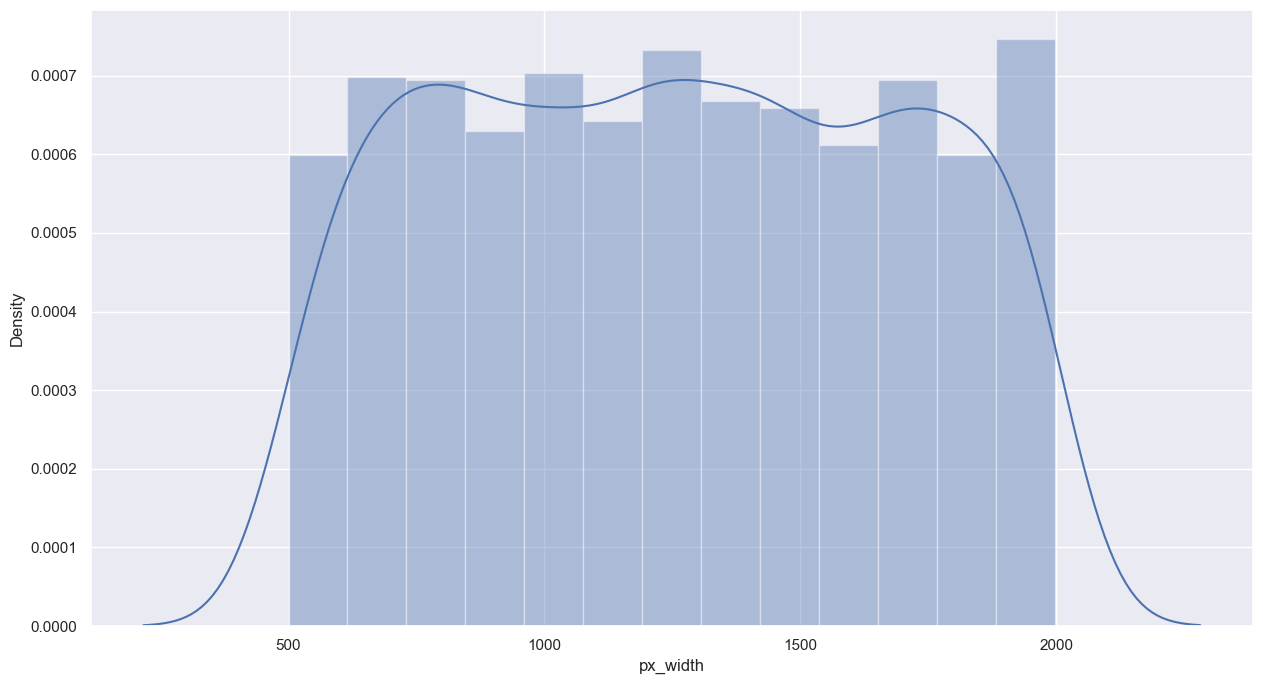

In [38]:
sns.distplot(data.px_width)

In [39]:
data.ram.describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

<AxesSubplot:>

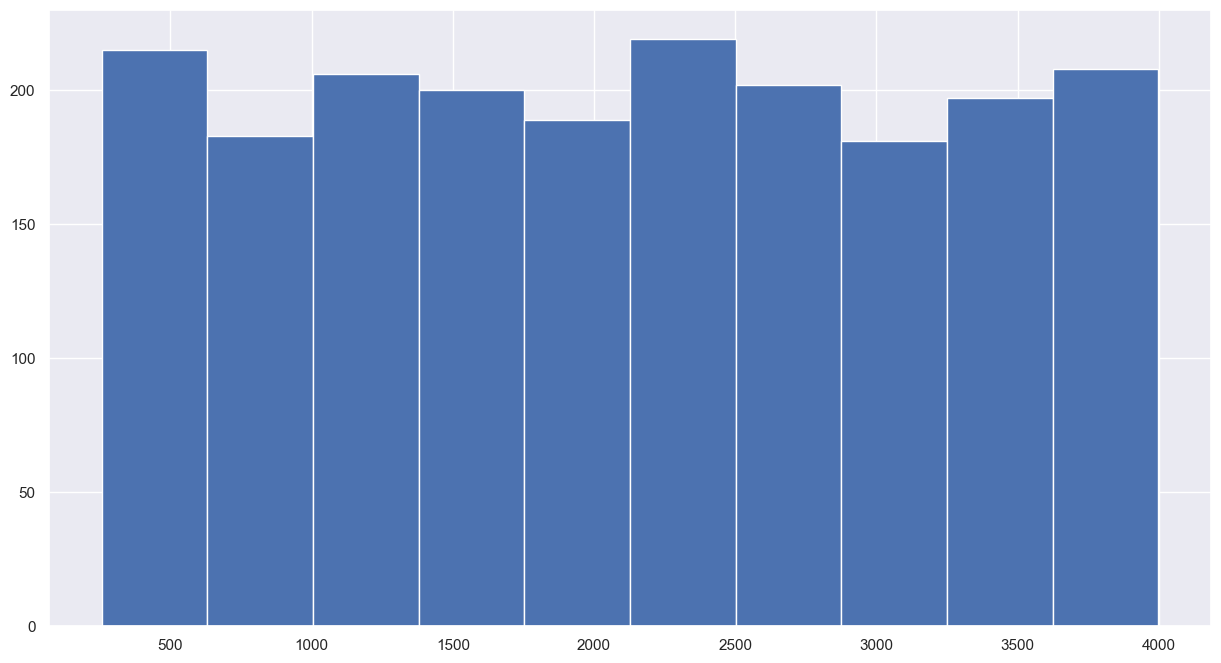

In [40]:
data.ram.hist()

<AxesSubplot:>

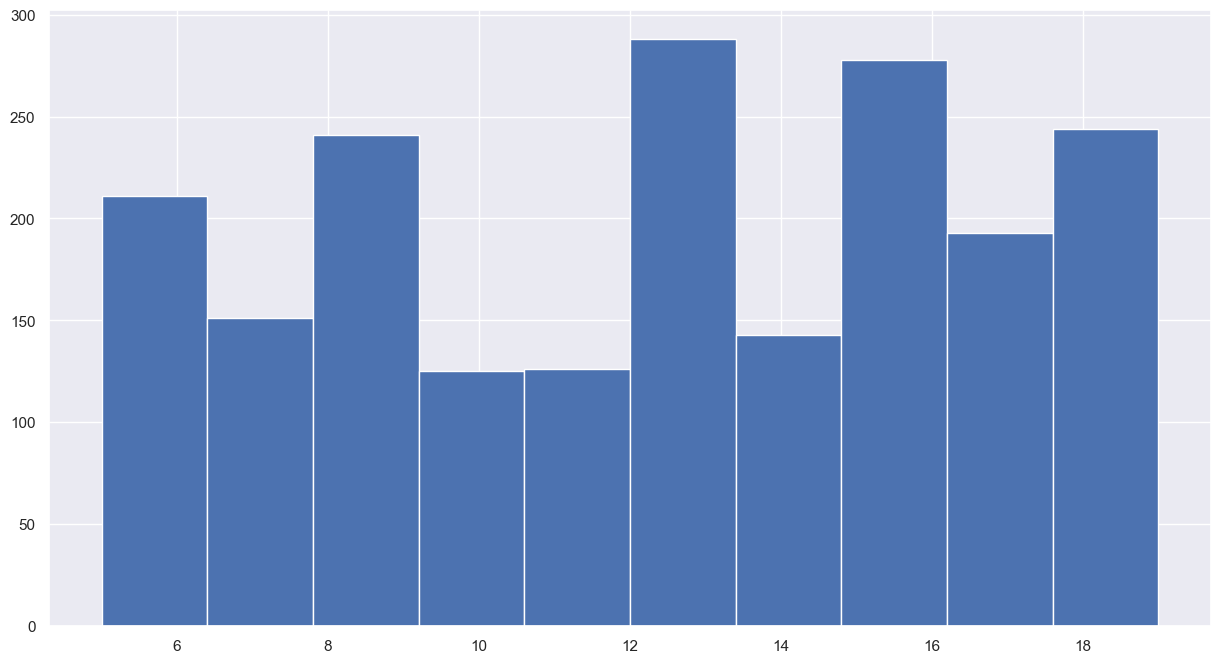

In [41]:
data.sc_h.hist()

<AxesSubplot:>

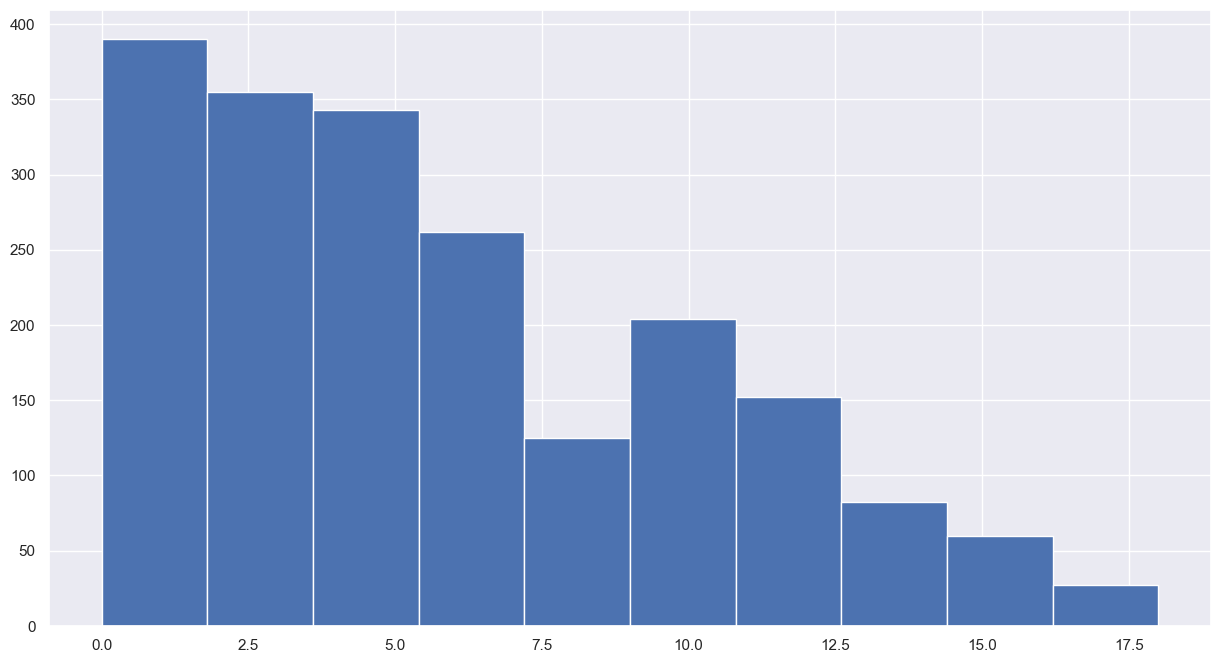

In [42]:
data.sc_w.hist()

In [43]:
data.talk_time.describe()

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

<AxesSubplot:>

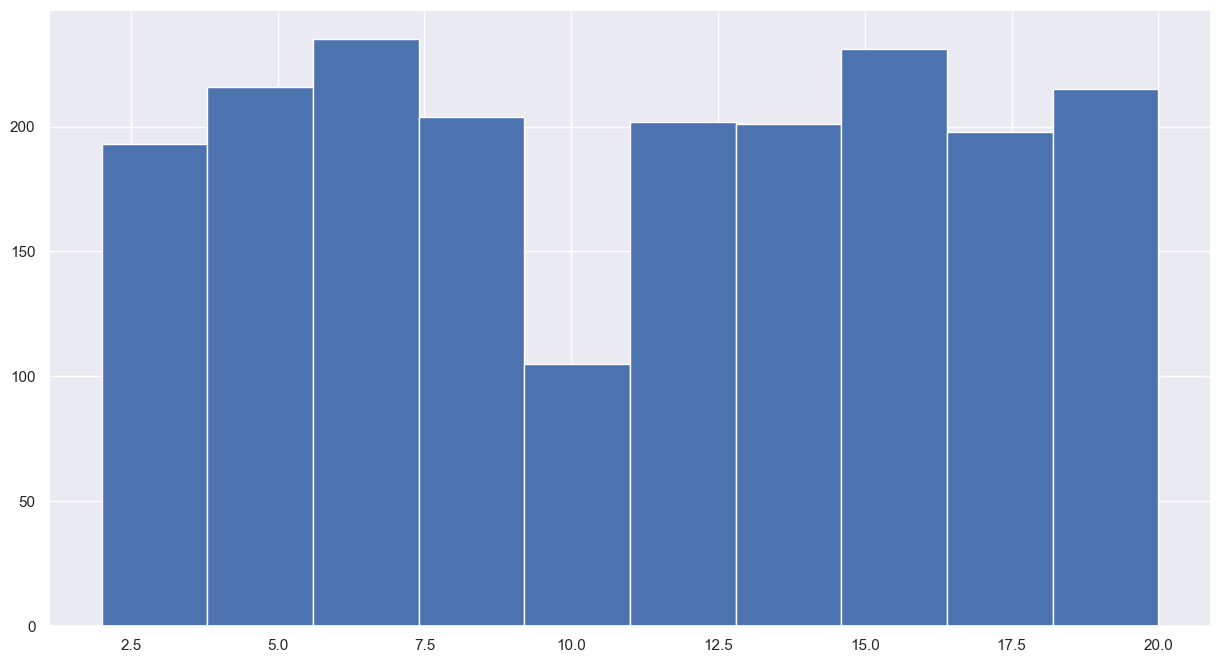

In [44]:
data.talk_time.hist()

In [45]:
data.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

<AxesSubplot:xlabel='three_g', ylabel='count'>

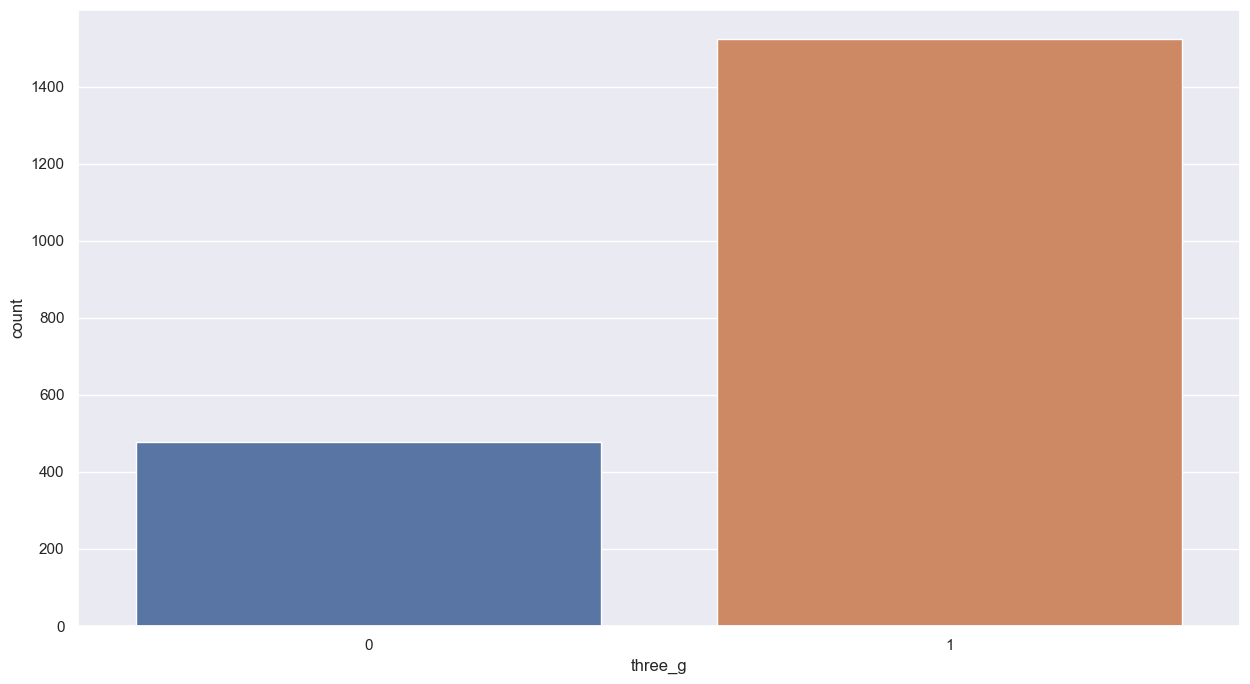

In [46]:
sns.countplot(data.three_g)

In [47]:
data.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

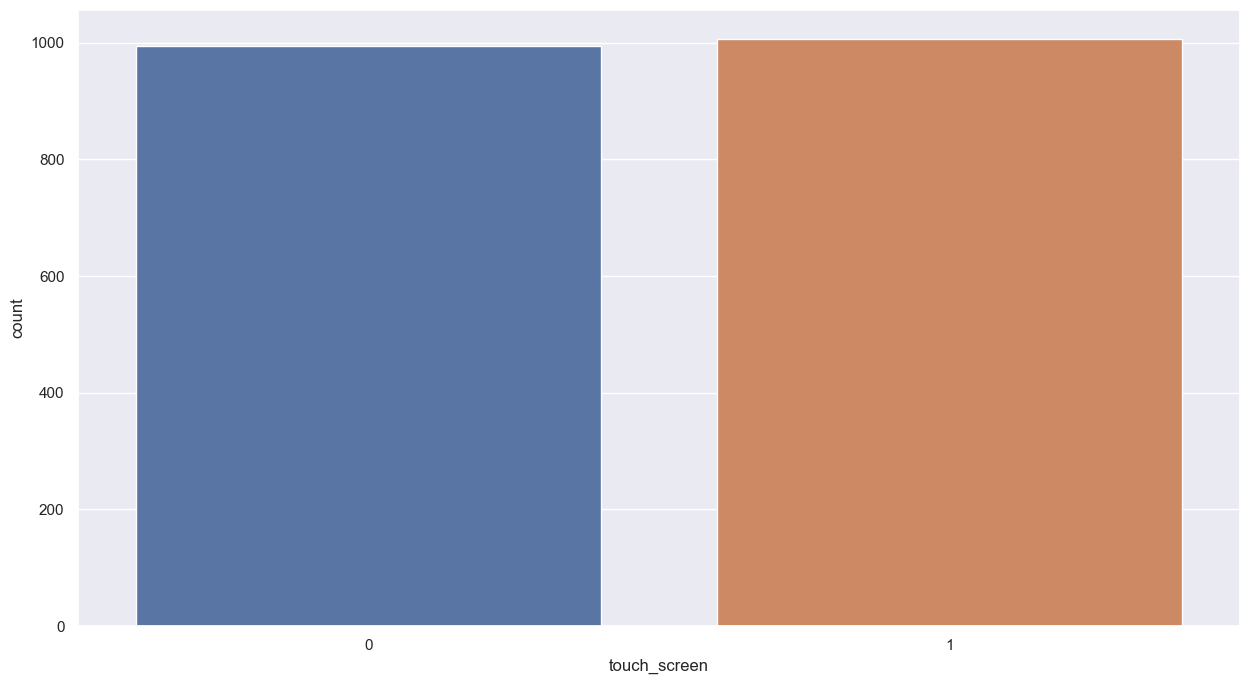

In [48]:
sns.countplot(data.touch_screen)

In [49]:
data.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

<AxesSubplot:xlabel='wifi', ylabel='count'>

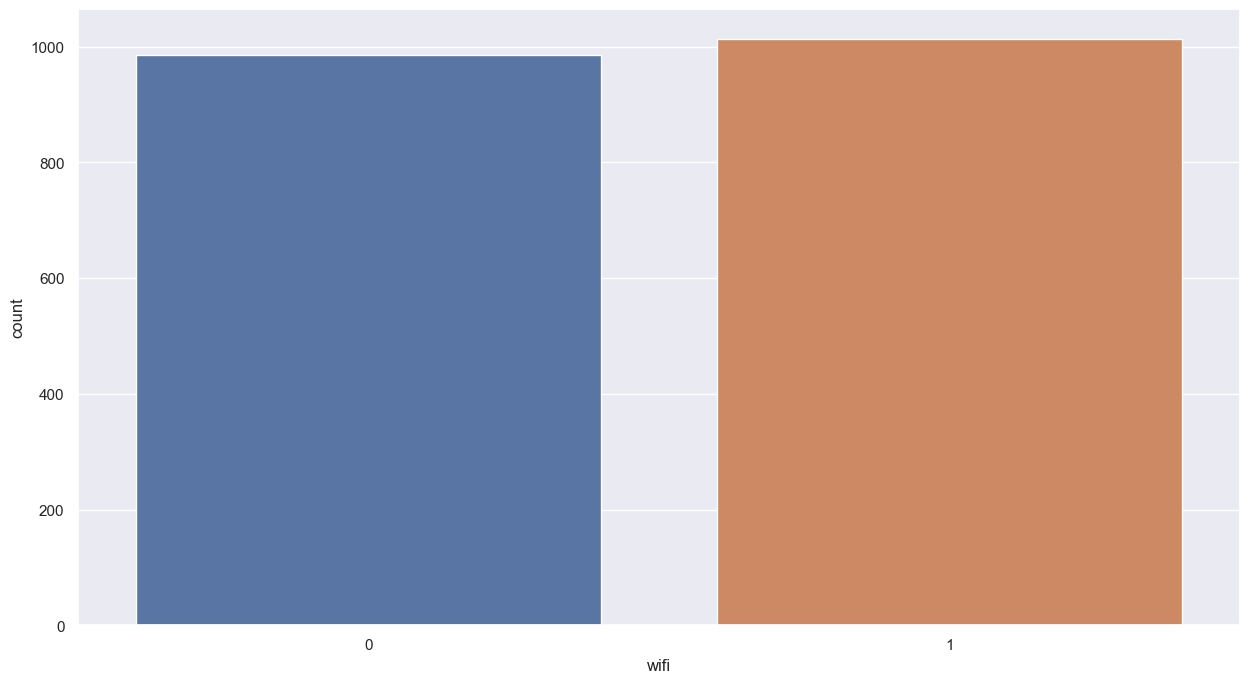

In [50]:
sns.countplot(data.wifi)

<AxesSubplot:xlabel='price_range', ylabel='count'>

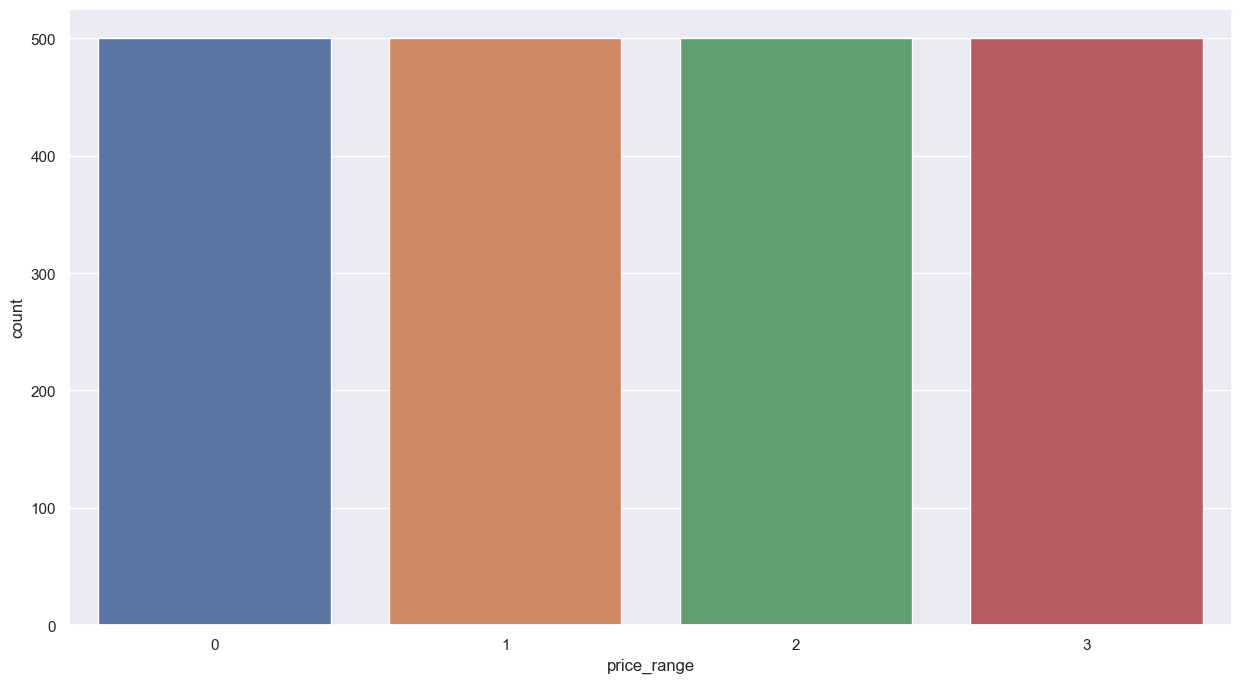

In [51]:
sns.countplot(data.price_range)

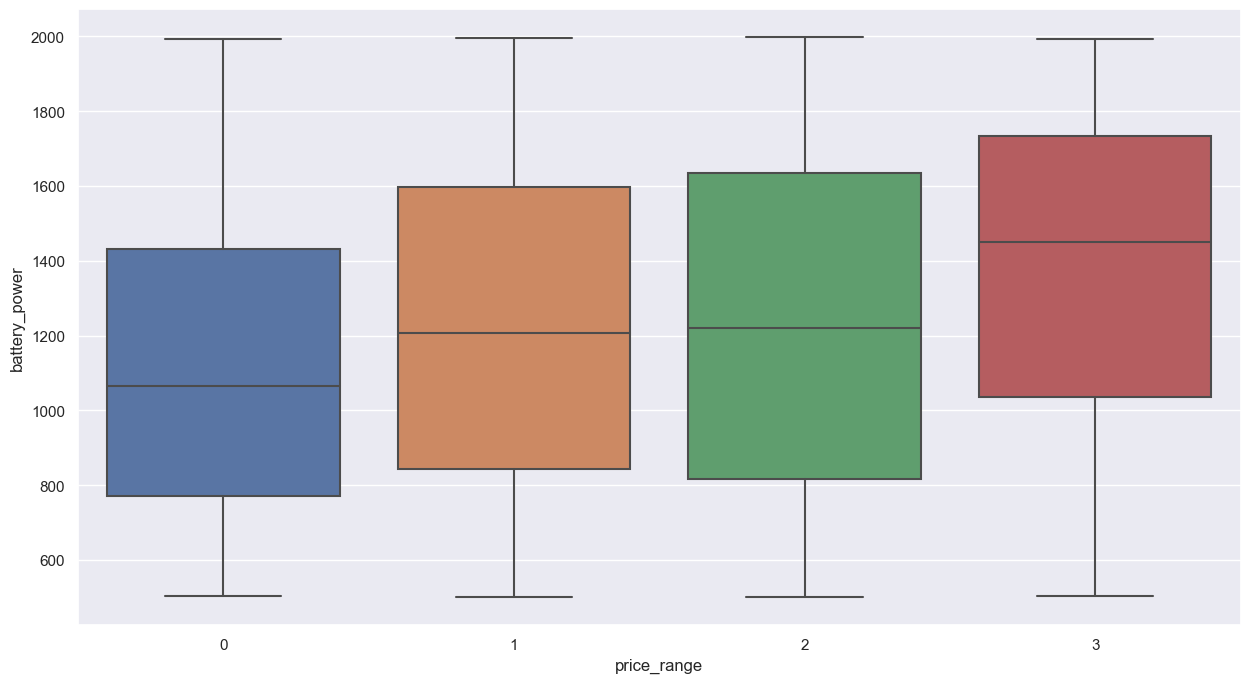

In [52]:
sns.boxplot(y= "battery_power",x ="price_range", data = data)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='count'>

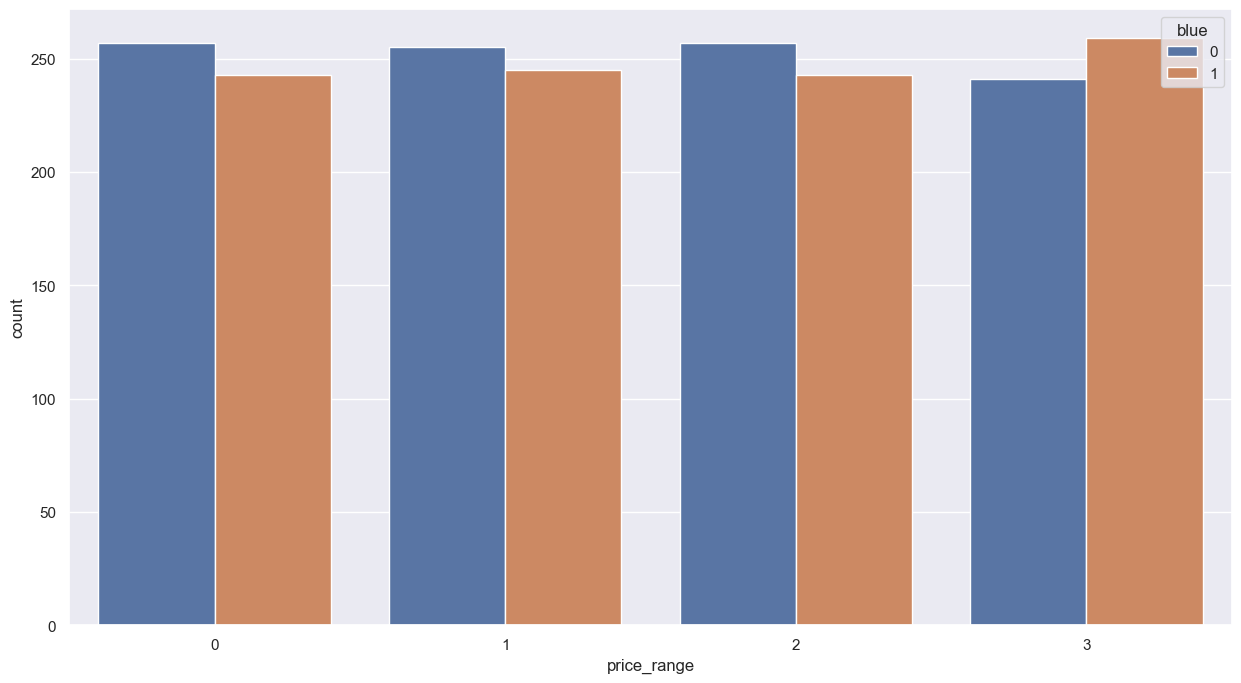

In [53]:
sns.countplot(x = "price_range", data = data,hue = data.blue)

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

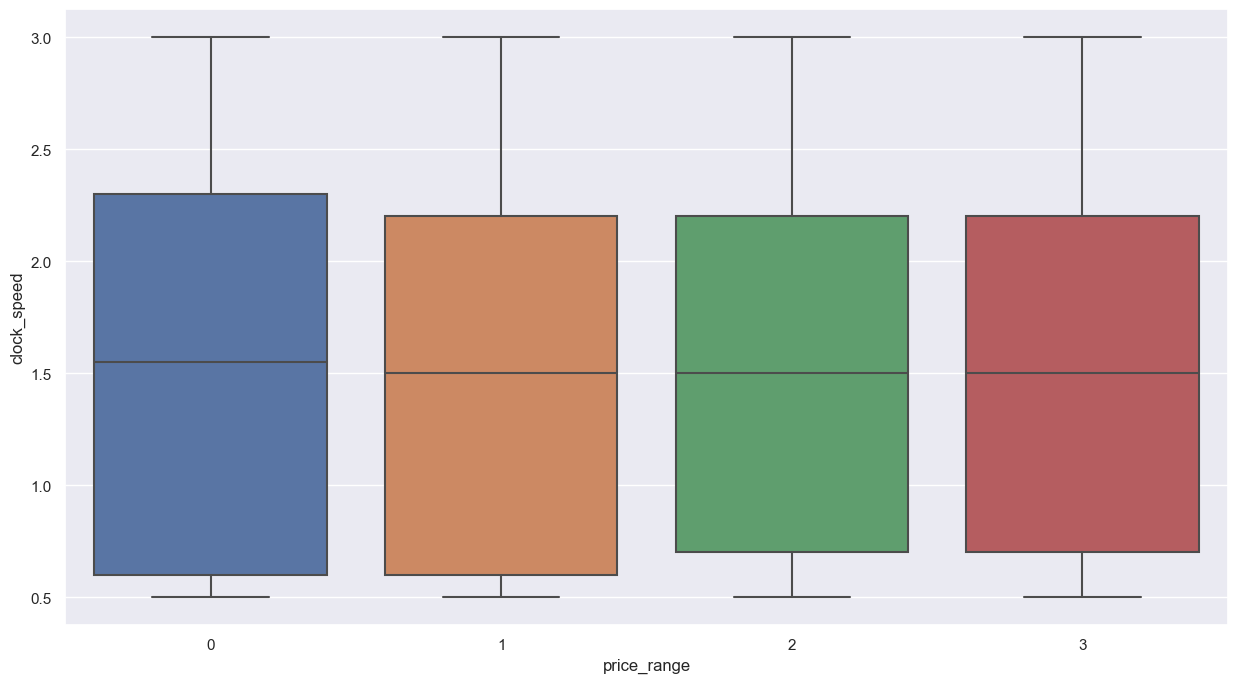

In [54]:
sns.boxplot(x = data.price_range, y = data.clock_speed)

<AxesSubplot:xlabel='price_range', ylabel='count'>

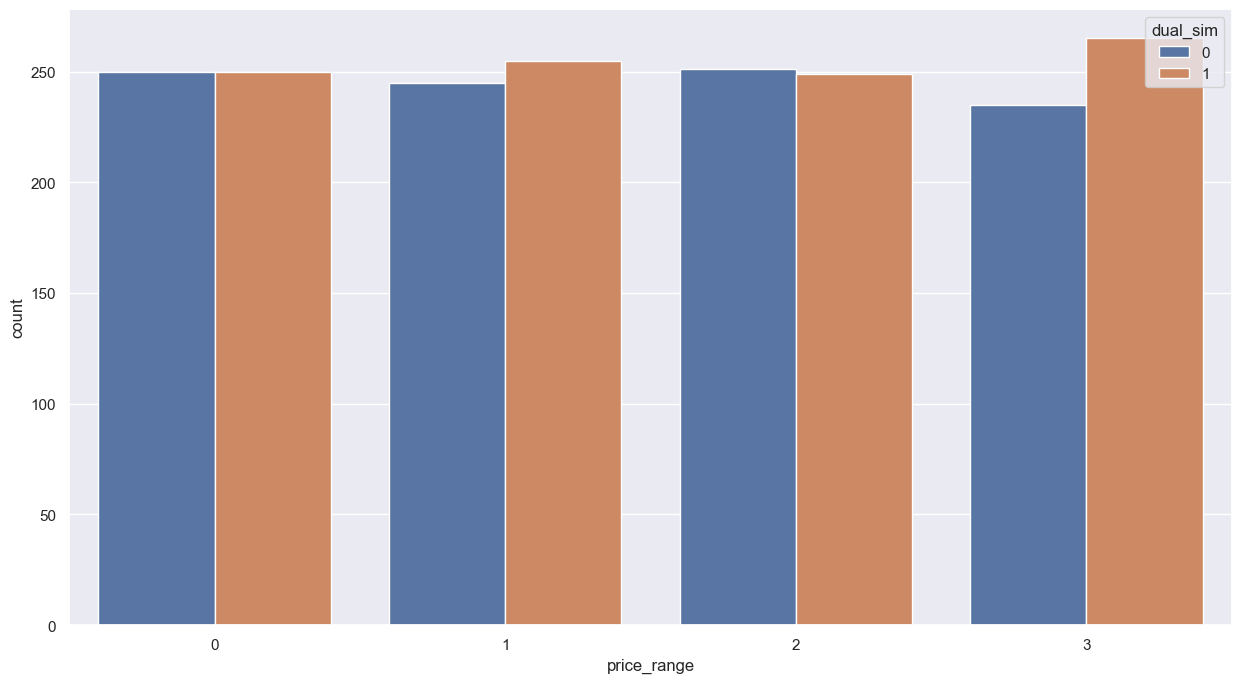

In [55]:
sns.countplot(data.price_range ,hue = data.dual_sim)

<AxesSubplot:xlabel='price_range', ylabel='fc'>

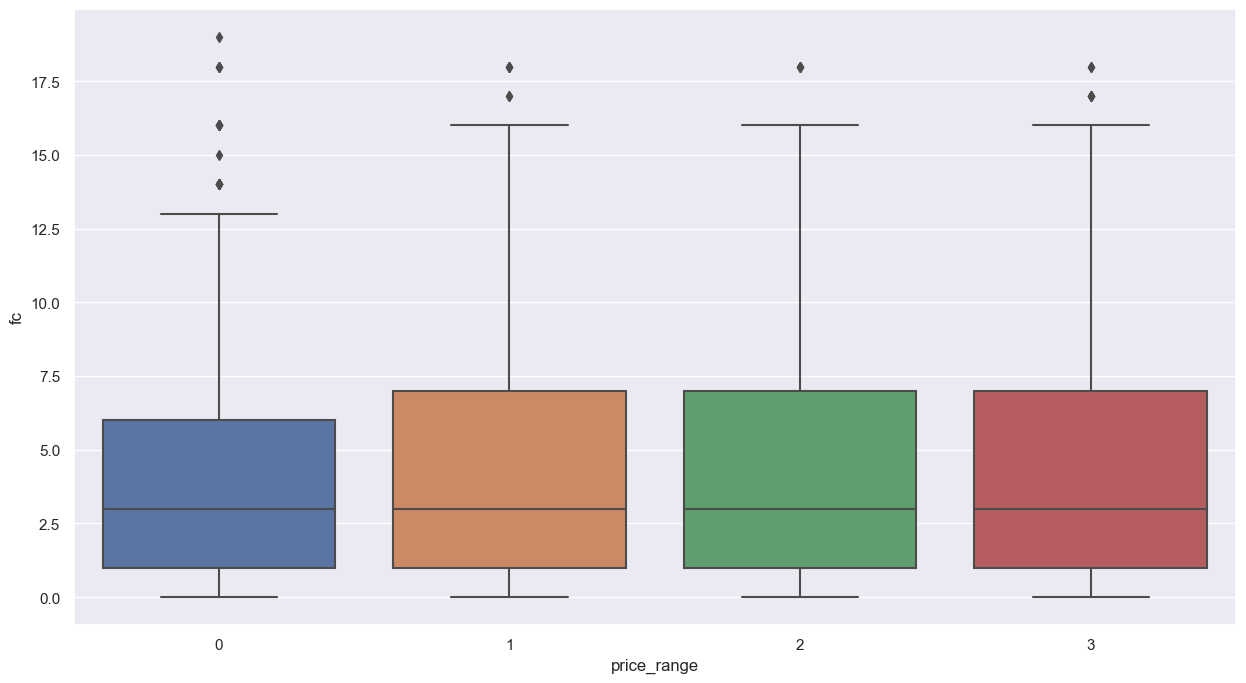

In [56]:
sns.boxplot(x="price_range",y = "fc",data = data)

<AxesSubplot:xlabel='price_range', ylabel='count'>

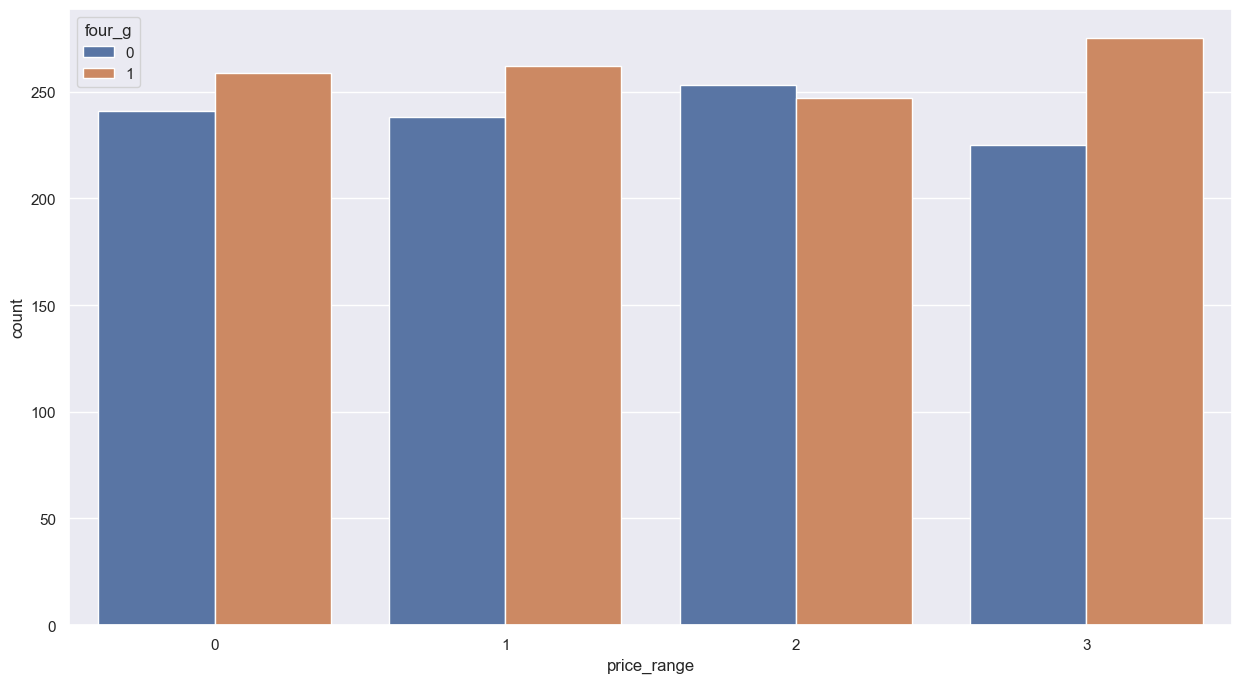

In [59]:
sns.countplot(data.price_range, hue = data.four_g)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

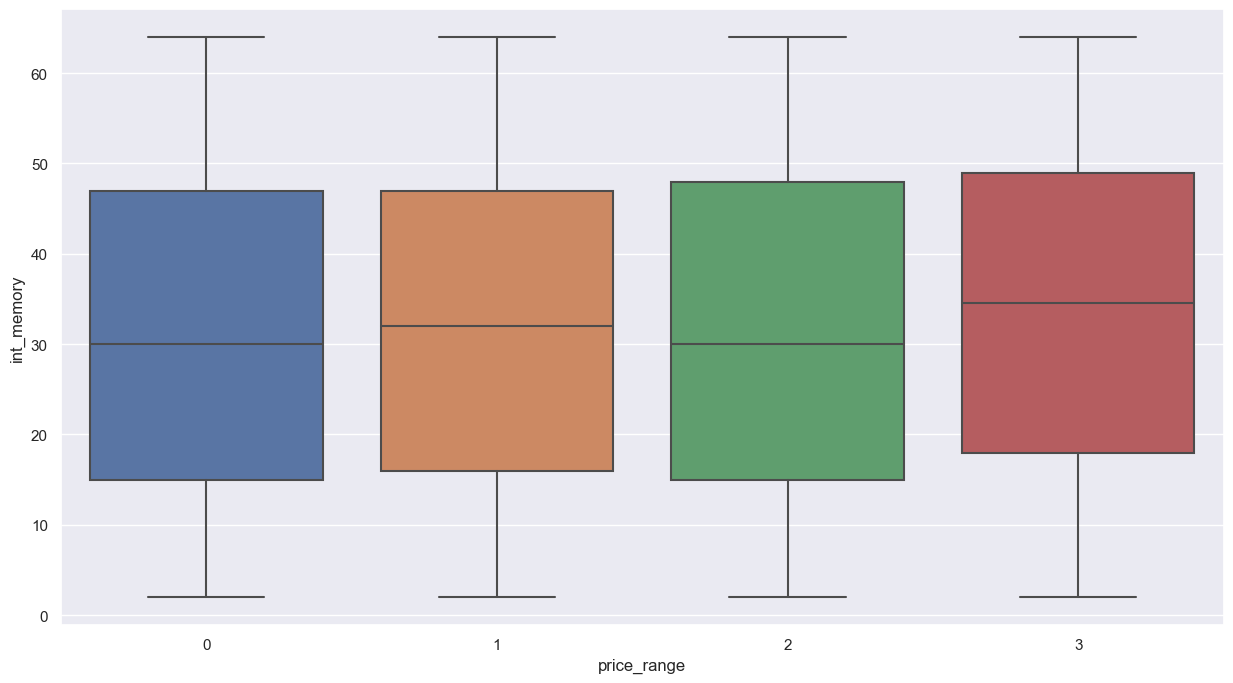

In [62]:
sns.boxplot(y = data.int_memory,x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

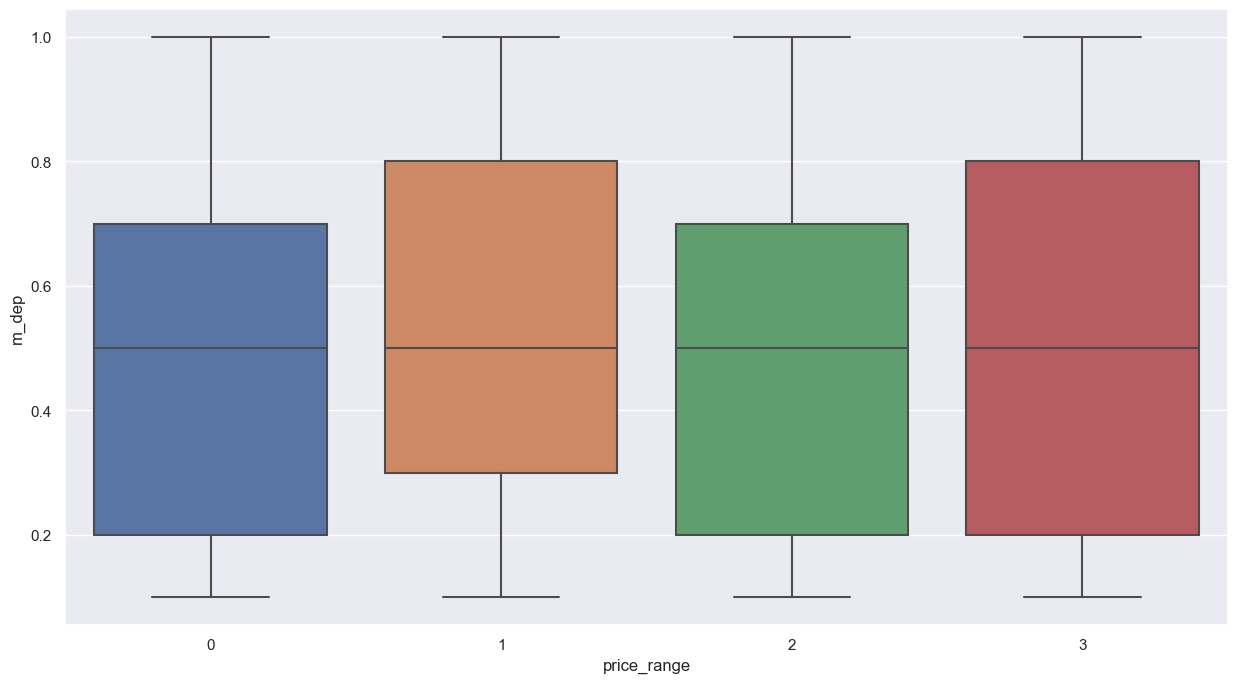

In [63]:
sns.boxplot( y = data.m_dep, x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

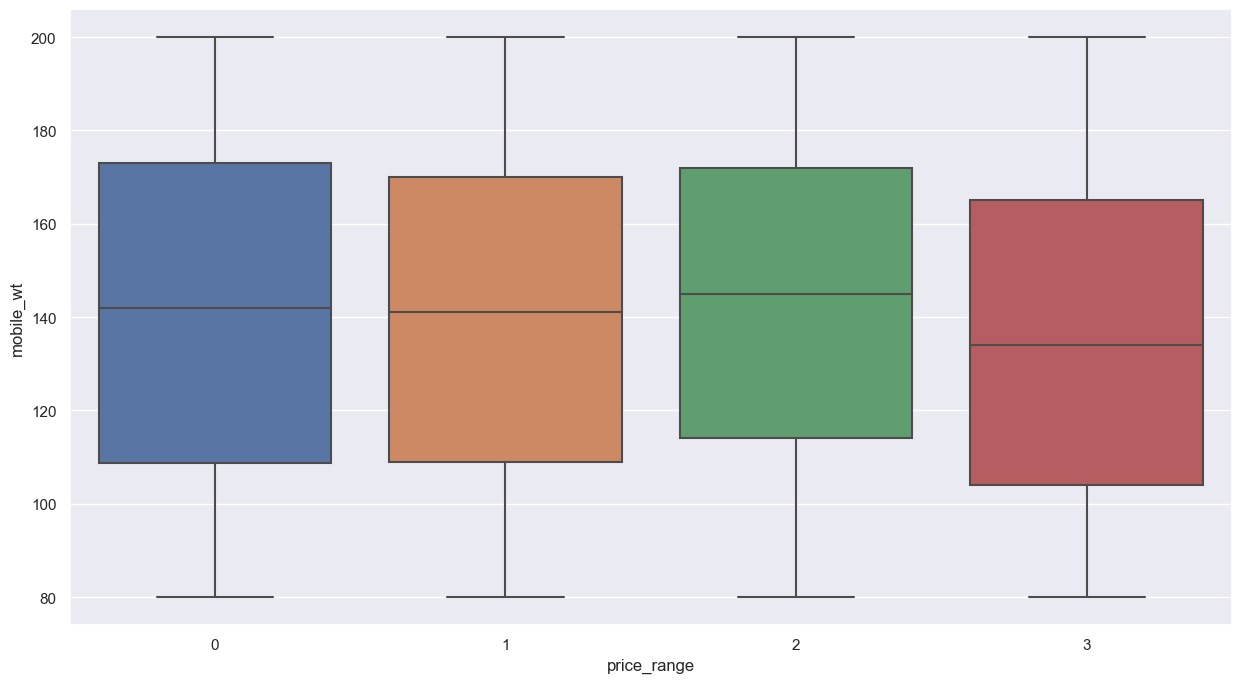

In [64]:
sns.boxplot(y = data.mobile_wt, x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='count'>

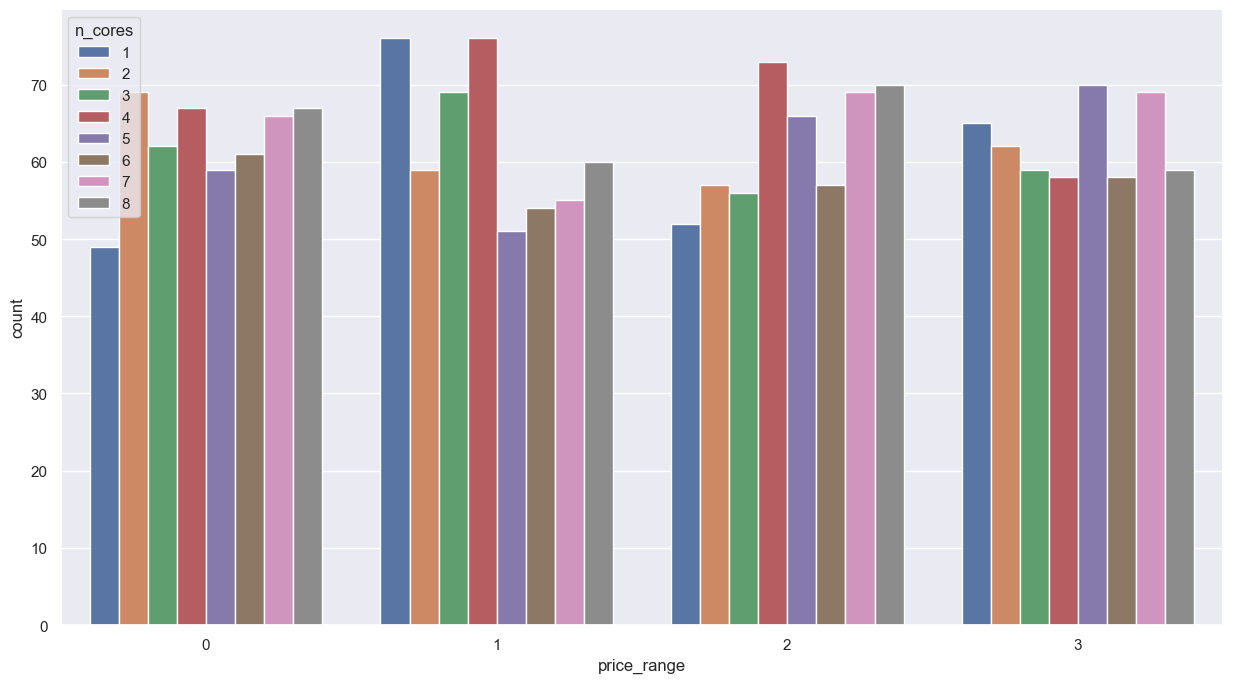

In [65]:
sns.countplot(data.price_range,hue=data.n_cores)

<AxesSubplot:xlabel='price_range', ylabel='pc'>

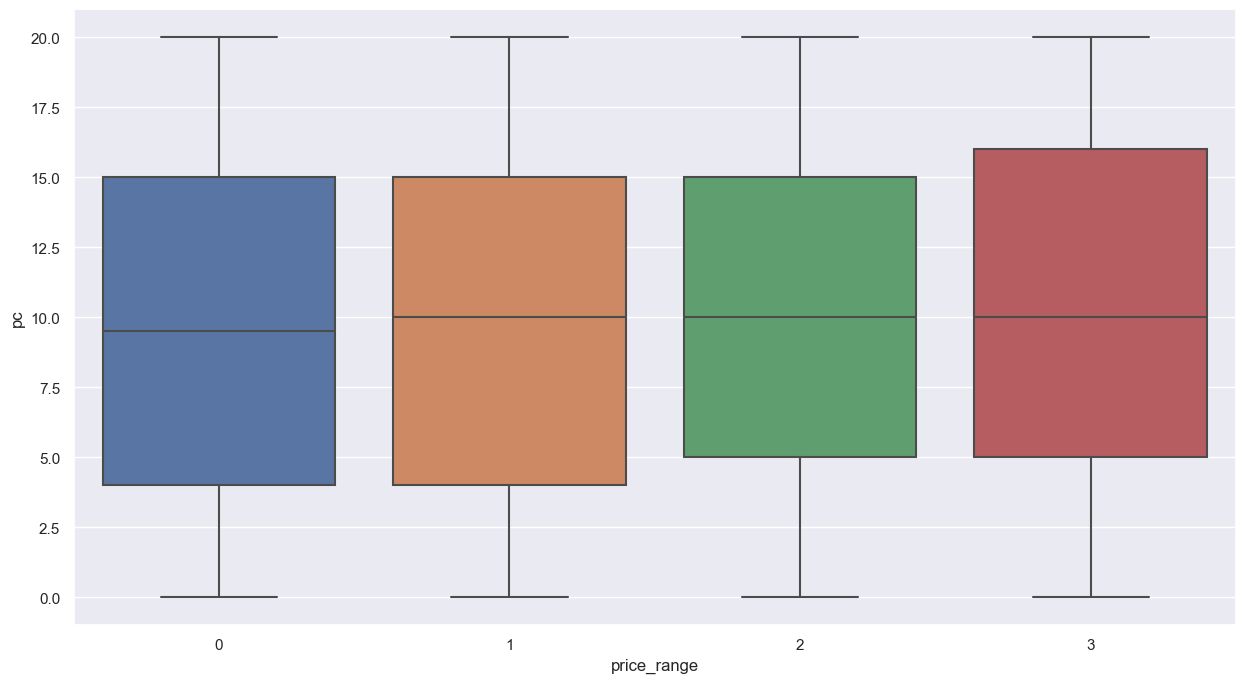

In [66]:
sns.boxplot(y = data.pc, x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

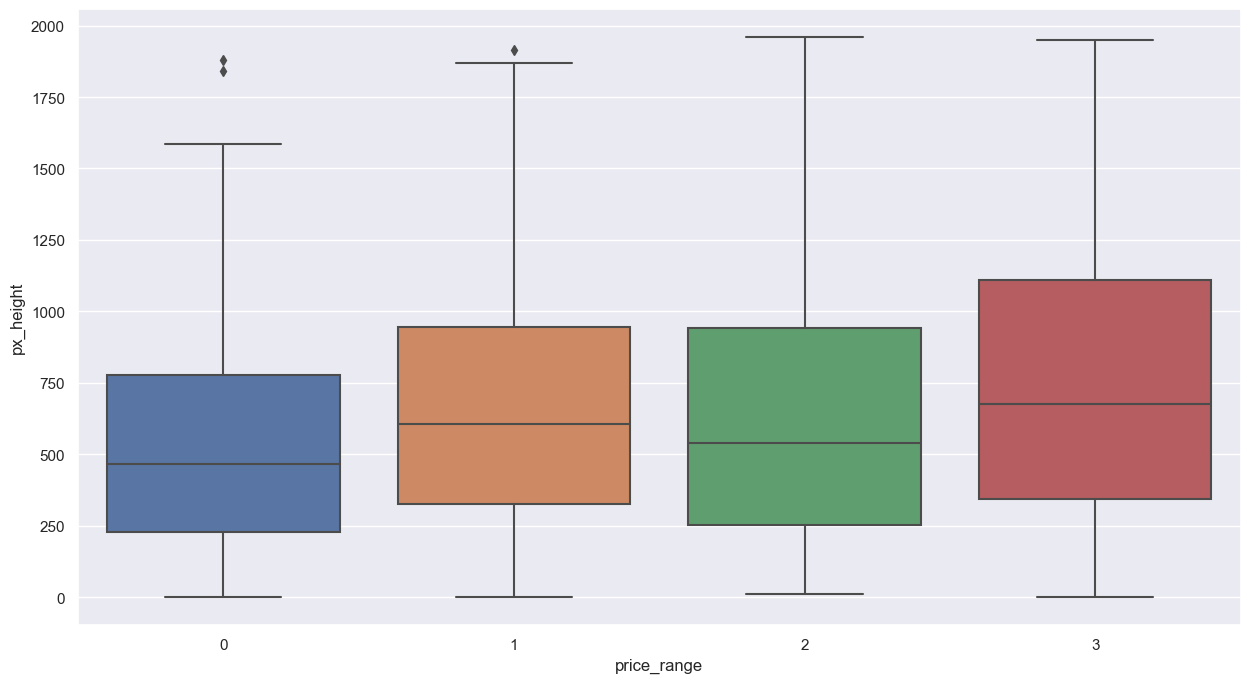

In [67]:
sns.boxplot(y = data.px_height, x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

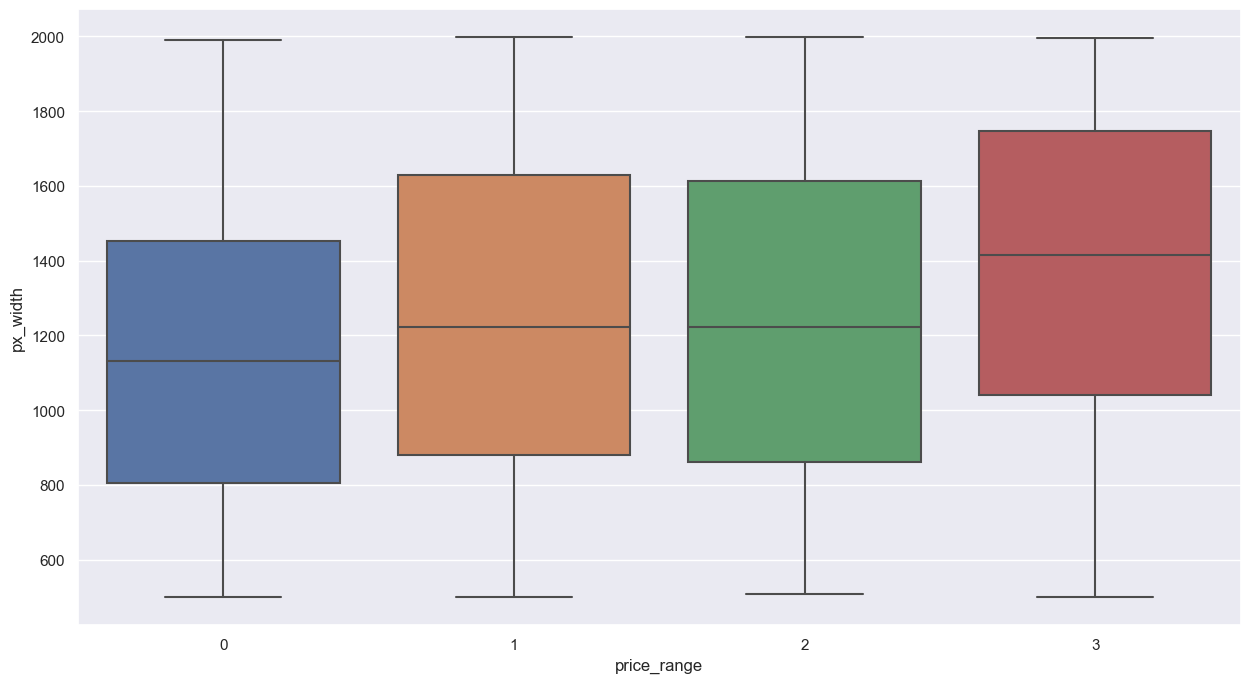

In [68]:
sns.boxplot(y = data.px_width, x = data.price_range)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

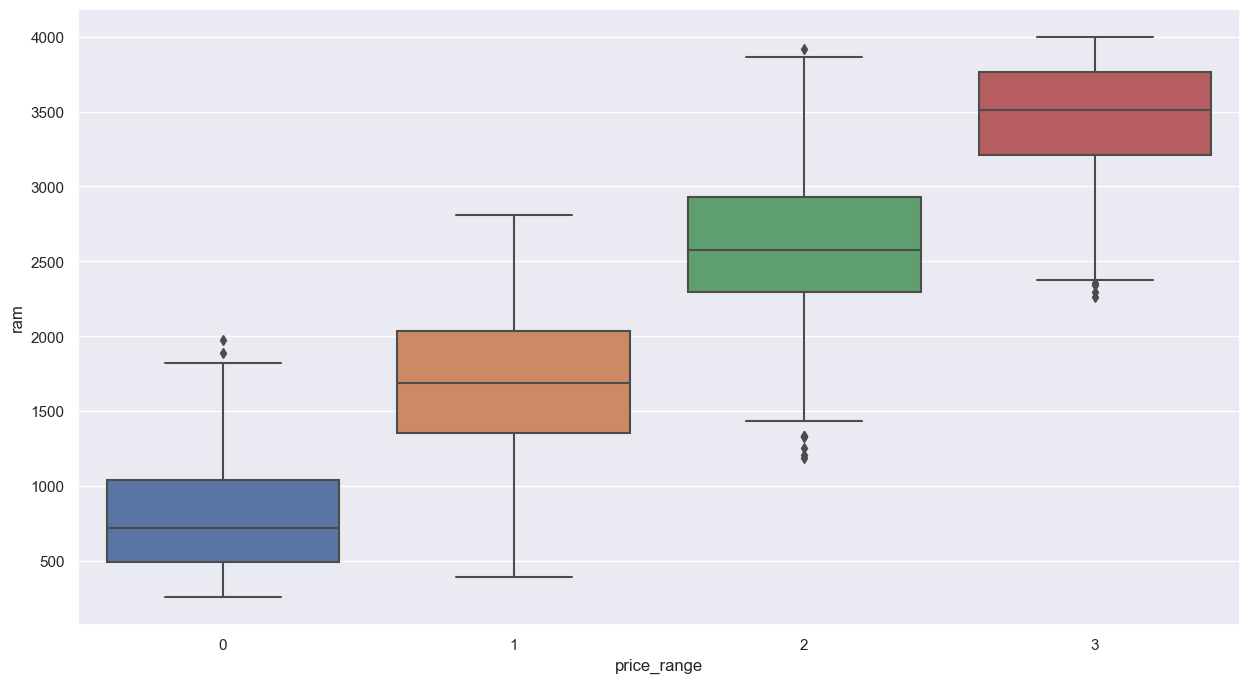

In [69]:
sns.boxplot(y = data.ram , x = data.price_range )

<AxesSubplot:xlabel='price_range', ylabel='sc_h'>

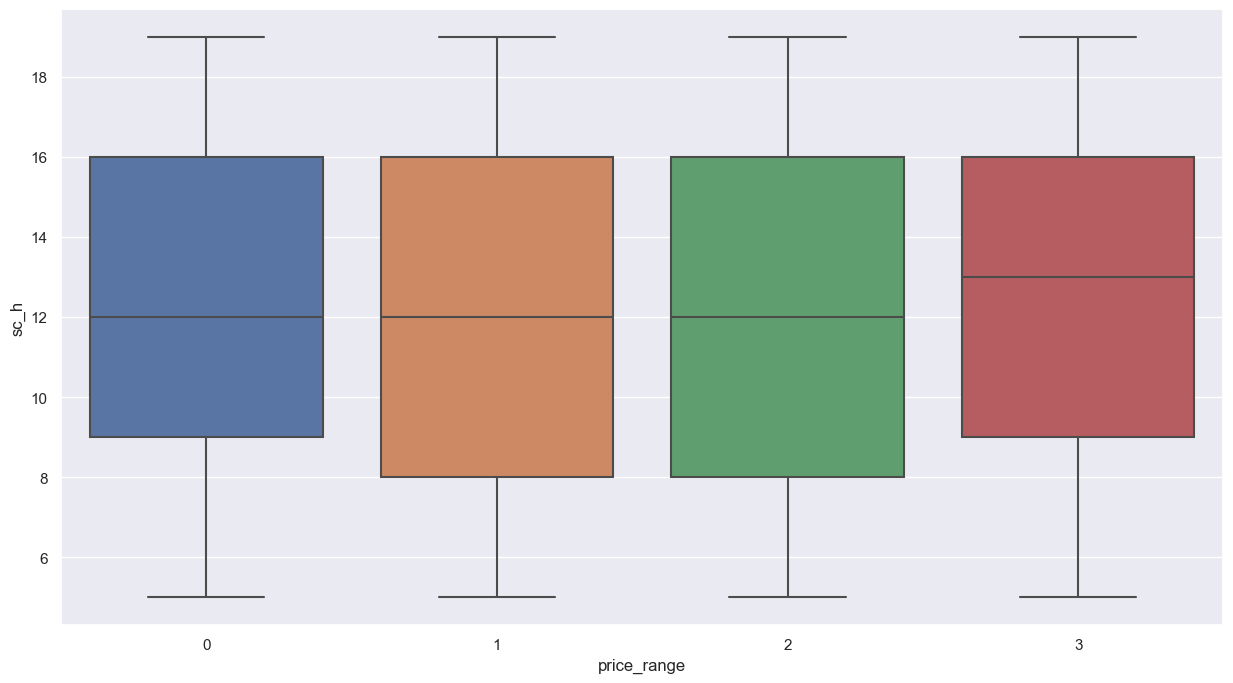

In [70]:
sns.boxplot(y = data.sc_h , x = data.price_range )

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

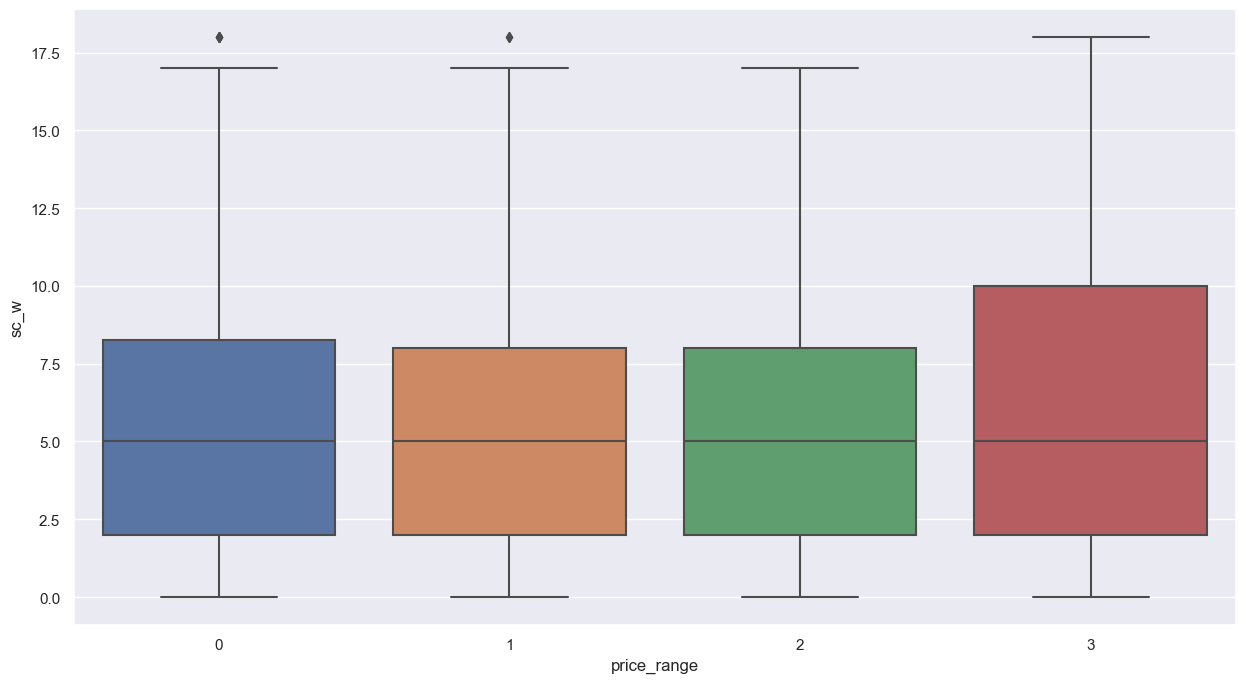

In [71]:
sns.boxplot(y = data.sc_w , x = data.price_range )

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

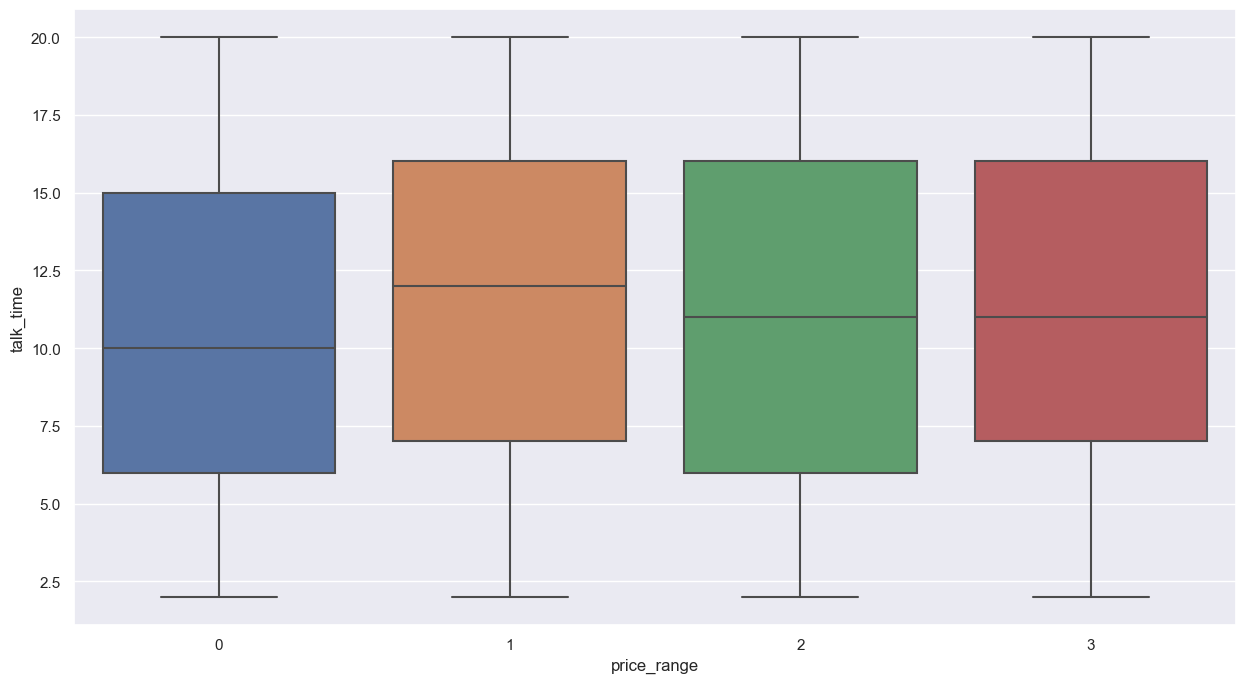

In [72]:
sns.boxplot(y = data.talk_time , x = data.price_range )

<AxesSubplot:xlabel='price_range', ylabel='count'>

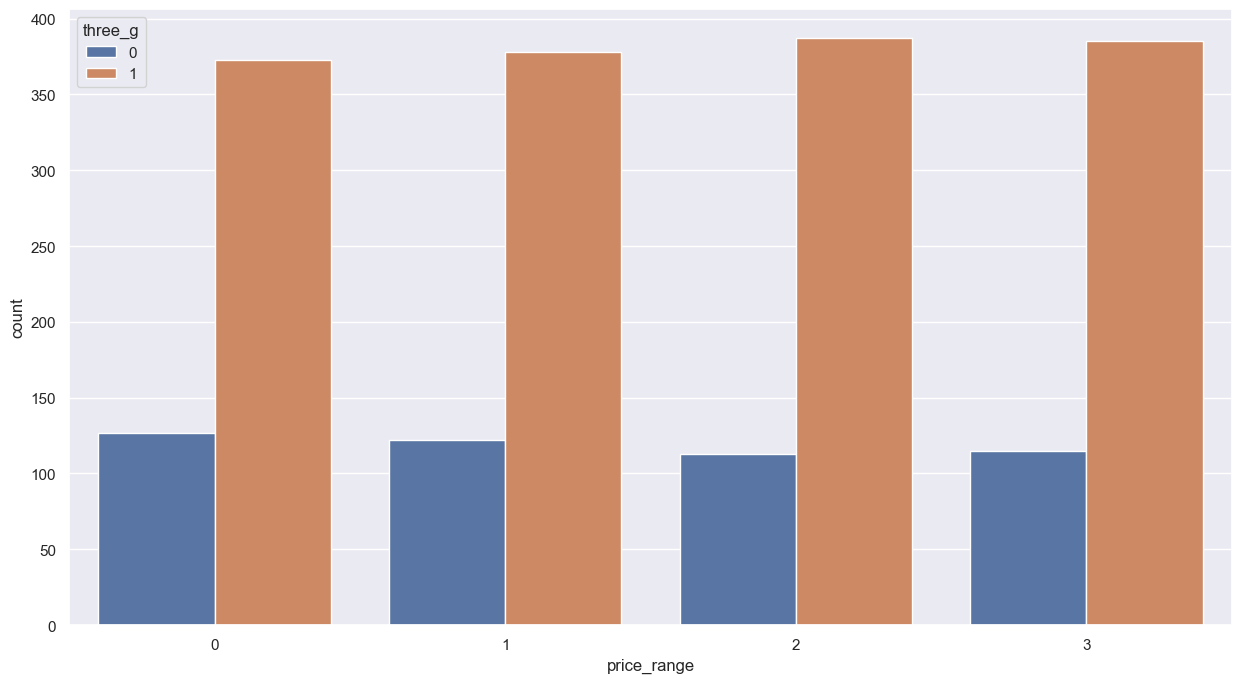

In [73]:
sns.countplot(data.price_range,hue=data.three_g)

<AxesSubplot:xlabel='price_range', ylabel='count'>

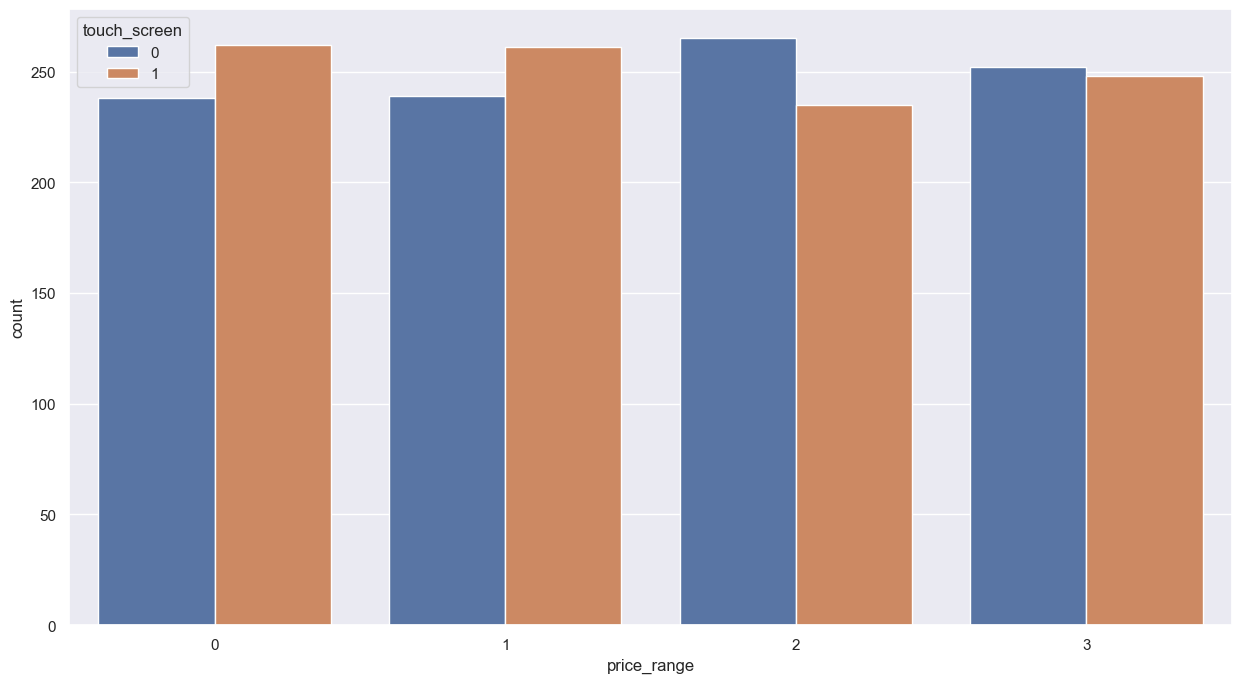

In [75]:
   sns.countplot(data.price_range,hue = data.touch_screen)

<AxesSubplot:xlabel='price_range', ylabel='count'>

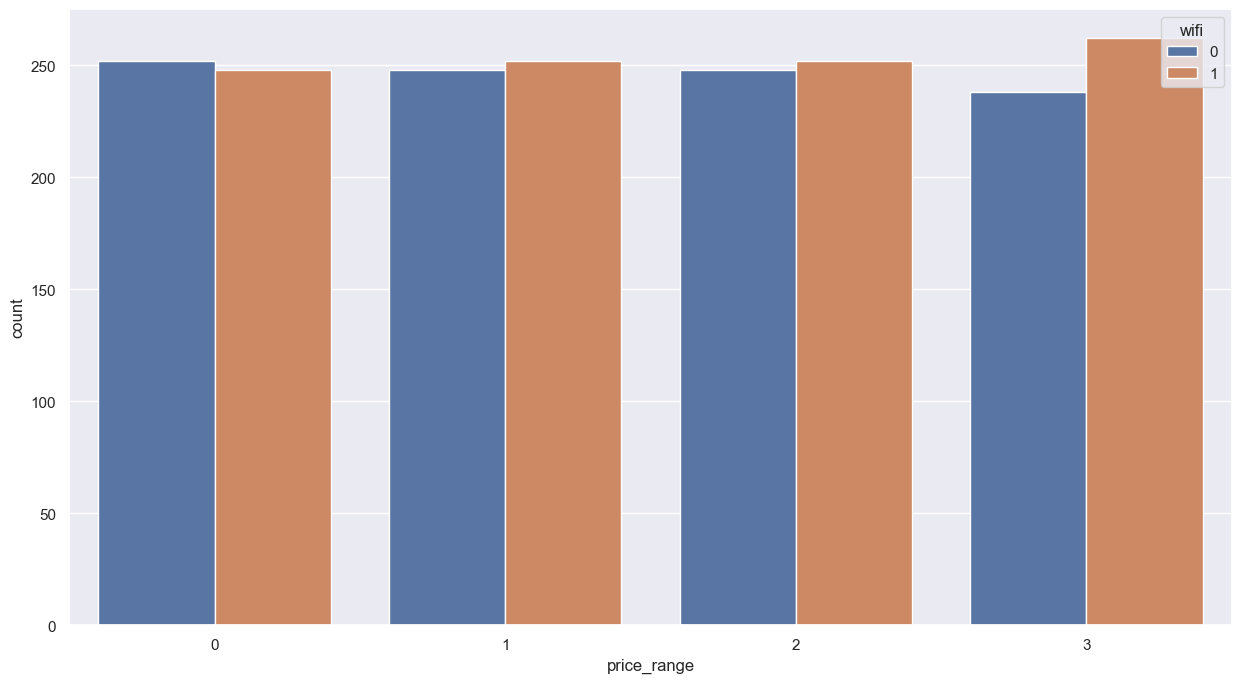

In [77]:
sns.countplot(data.price_range,hue = data.wifi)

## Multivariate Analysis

In [87]:
data_num = data.copy()
data_num.price_range = data.price_range.astype(int)

In [88]:
corrmat = data_num.corr()
corrmat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
pc,0.031441,-0.009952,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


<AxesSubplot:>

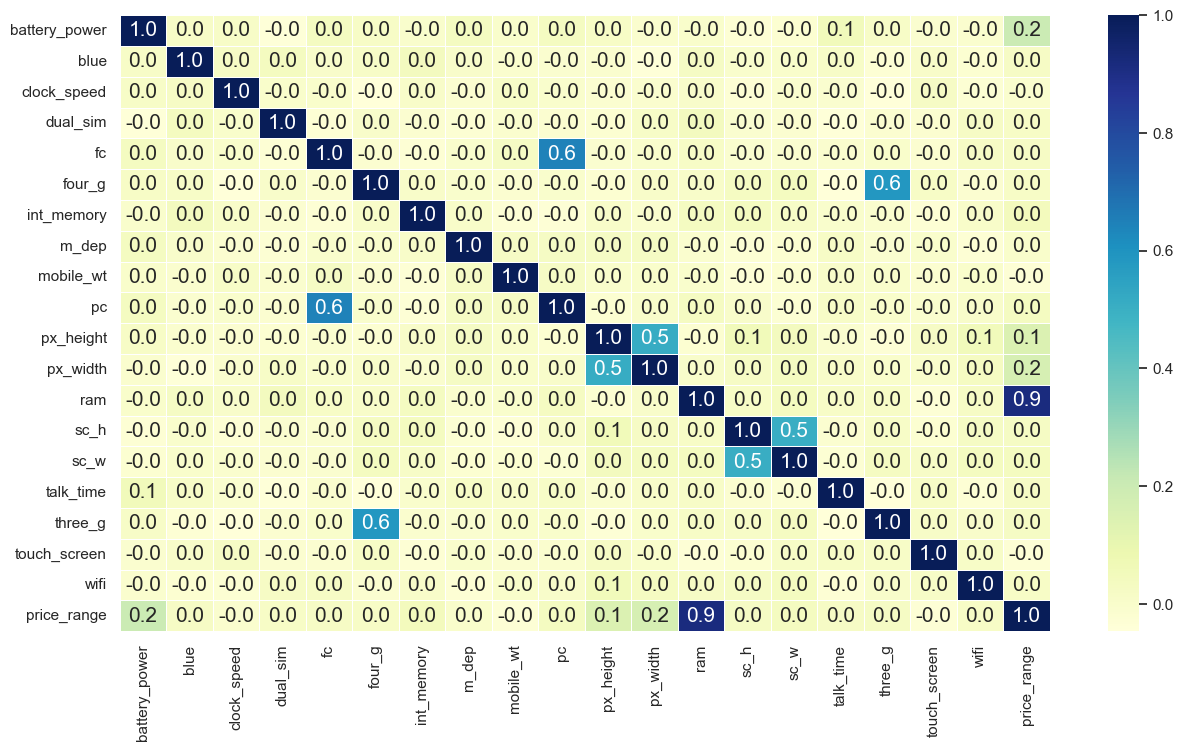

In [90]:
sns.heatmap(corrmat,annot = True, cmap = "YlGnBu",linewidths = .5, fmt = ".1f", annot_kws = {"size":15})

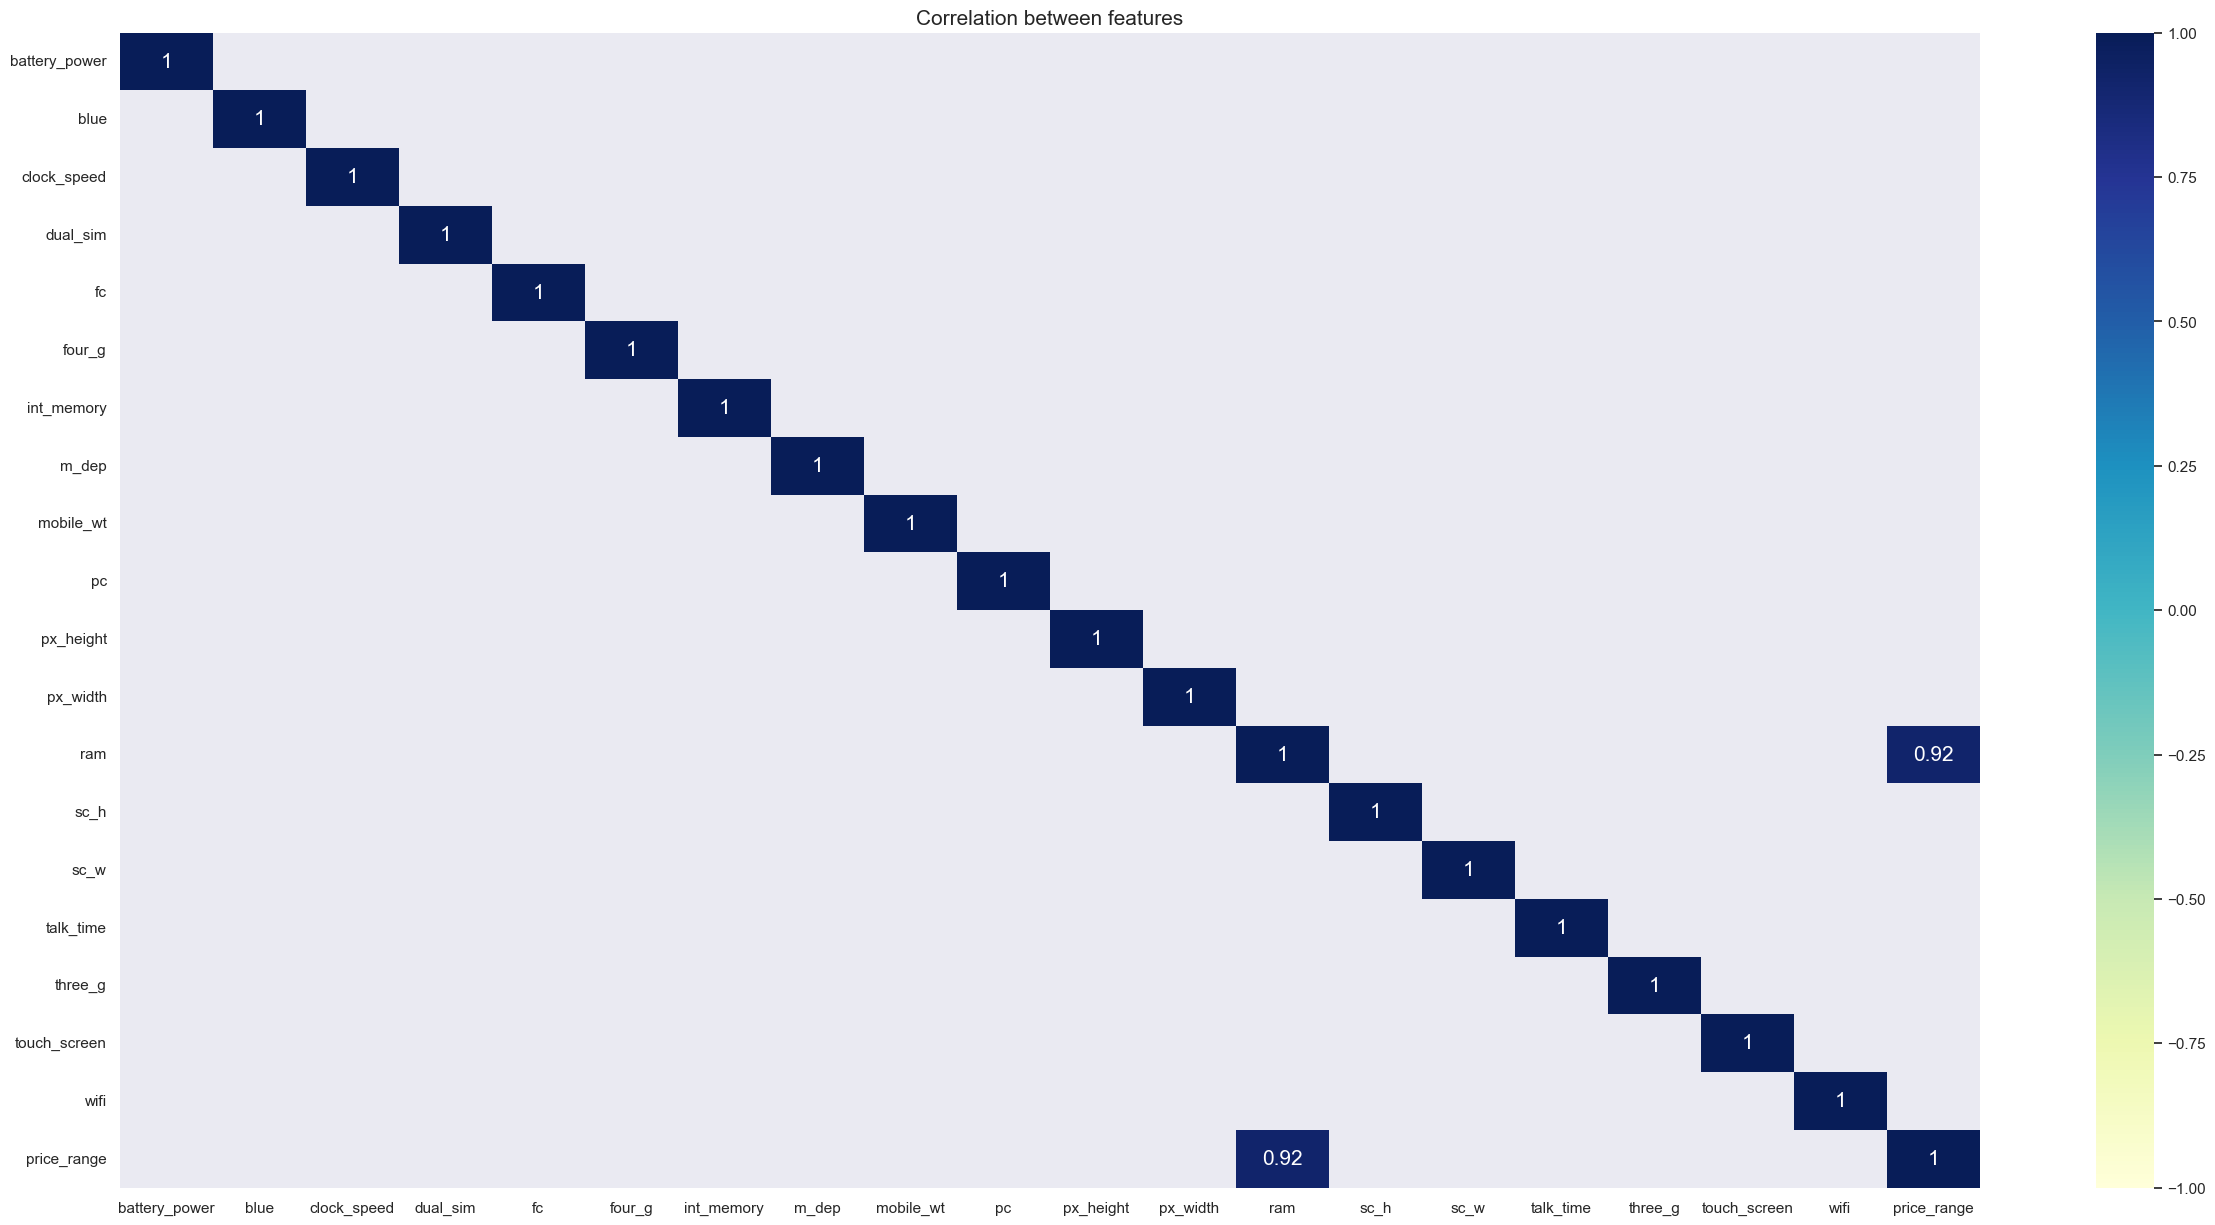

In [92]:
plt.figure(figsize=(30, 15))
sns.heatmap(corrmat[(corrmat >= 0.9) | (corrmat <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

Conclusion from heatmap :

As we can see our target price range has highly positive correlation between ram.
Below features have highly positive correlation
3G and 4G
pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

## Conclusion of EDA
Feature Removal:

pc(Primary Camera mega pixels) and fc(Front Camera mega pixels) are highly correlated

Outliers Summary:

fc
px_height
ram
sc_w
Note : we will not remove outliers are they are outliers for individual price range, so ignoring them

In [94]:
data_with_dummies = pd.get_dummies(data.drop(["price_range"],axis = 1), drop_first = True)
data_with_dummies["price_range"] = data.price_range
data_with_dummies.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1,0,0,0,0,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,905,1988,2631,17,3,7,1,1,0,0,1,0,0,0,0,0,2
2,563,1,0.5,1,2,1,41,0.9,145,6,1263,1716,2603,11,2,9,1,1,0,0,0,0,1,0,0,0,2
3,615,1,2.5,0,0,0,10,0.8,131,9,1216,1786,2769,16,8,11,1,0,0,0,0,0,0,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,1208,1212,1411,8,2,15,1,1,0,1,0,0,0,0,0,0,1


## Feature Selection

In [95]:
X = data_with_dummies.drop(['price_range'],axis = 1)
y = data_with_dummies['price_range'].astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10000, random_state = 10, n_jobs = -1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=10)

In [102]:
feat_labels = X.columns.values
feature_inportance = []
for feature in zip(feat_labels, clf.feature_importances_):
    feature_inportance.append(feature)

In [103]:
feature_inportance

[('battery_power', 0.07288692592407492),
 ('blue', 0.0071019003979510735),
 ('clock_speed', 0.030313183744161323),
 ('dual_sim', 0.007380814897726419),
 ('fc', 0.026153356581016703),
 ('four_g', 0.006978054384643688),
 ('int_memory', 0.03877197098186407),
 ('m_dep', 0.026134214213350885),
 ('mobile_wt', 0.04038214080580121),
 ('pc', 0.0306115743289679),
 ('px_height', 0.055991289111442695),
 ('px_width', 0.05750131258597164),
 ('ram', 0.4552216204092264),
 ('sc_h', 0.028196400163179047),
 ('sc_w', 0.02961206806167022),
 ('talk_time', 0.031607135467614504),
 ('three_g', 0.006145299672325559),
 ('touch_screen', 0.0074865889199059316),
 ('wifi', 0.007039499793610291),
 ('n_cores_2', 0.004840885462029825),
 ('n_cores_3', 0.004486196473046092),
 ('n_cores_4', 0.005040232302534401),
 ('n_cores_5', 0.005511180505713892),
 ('n_cores_6', 0.004654937646576417),
 ('n_cores_7', 0.005028512329926793),
 ('n_cores_8', 0.004922704835668031)]

In [105]:
from sklearn.feature_selection import SelectFromModel 
sfm = SelectFromModel(clf, threshold=0.01)

In [106]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=10),
                threshold=0.01)

In [108]:
selected_features = []
for feature_list_index in sfm.get_support(indices = True):
     selected_features.append(feat_labels[feature_list_index])

In [110]:
selected_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [111]:
data_selected = data_with_dummies[selected_features]
data_selected.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15


## Feature Scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [113]:
scaler = MinMaxScaler()

In [115]:
scaler.fit(data_selected)

MinMaxScaler()

In [116]:
data_standardised = scaler.fit_transform(data_selected)

## Spliting data

In [117]:
X = data_standardised
y = data_with_dummies['price_range'].astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (1400, 13)
X_test  (600, 13)
y_train  (1400,)
y_test  (600,)


## Building a model

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

In [120]:
gnb = GaussianNB()

# define the ovr strategy
GNB = OneVsRestClassifier(gnb)

#One-vs-the-rest (OvR) multiclass strategy
#This is the most commonly used strategy for multiclass classification

# fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [121]:
y_pred_GNB = GNB.predict(X_test)

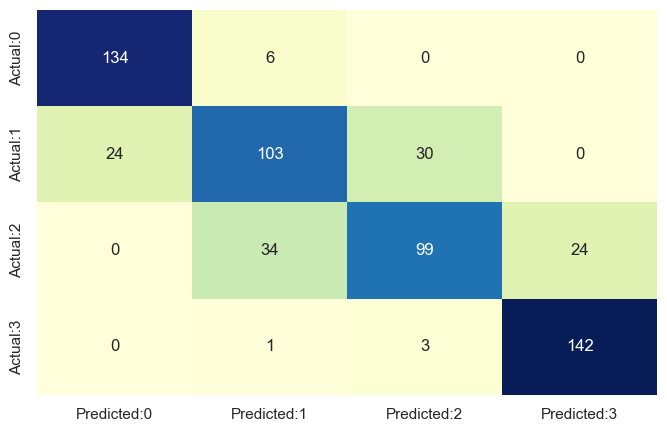

In [122]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                           index=['Actual:0','Actual:1','Actual:2','Actual:3'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a color bar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [123]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_GNB)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       140
           1       0.72      0.66      0.68       157
           2       0.75      0.63      0.69       157
           3       0.86      0.97      0.91       146

    accuracy                           0.80       600
   macro avg       0.79      0.80      0.79       600
weighted avg       0.79      0.80      0.79       600



In [124]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Naive_bayes = pd.Series({'Model': "Naive Bayes",
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB,average="macro"),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB ,average="macro"),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),
                  'f1-score':metrics.f1_score(y_test, y_pred_GNB,average = "macro")})

# Macro average Scores - It is the simple mean of scores of all the classes i.e. 0, 1, 2, 3 in this
# case for recall, precision and f1 etc. 

# appending our result table
result_tabulation = result_tabulation.append(Naive_bayes , ignore_index = True)

# view the result table
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.7922,0.804092,0.796667,0.794773
